# Case 1: Austo Motor Company

## Importing libraries

In [971]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as pxp
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [972]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.21.5
1.4.4
0.11.2


## Loading  and viewing dataset

In [973]:
austo=pd.read_csv('austo_automobile+(2)+(1).csv')

### A.What is the important technical information about the dataset that a database administrator would be interested in? (Hint: Information about the size of the dataset and the nature of the variables)

In [974]:
austo.shape

(1581, 14)

In [975]:
austo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


In [976]:
austo.head()

Age  Gender Profession Marital_status      Education  No_of_Dependents  \
0   53    Male   Business        Married  Post Graduate                 4   
1   53   Femal   Salaried        Married  Post Graduate                 4   
2   53  Female   Salaried        Married  Post Graduate                 3   
3   53  Female   Salaried        Married       Graduate                 2   
4   53    Male   Salaried        Married  Post Graduate                 3   

  Personal_loan House_loan Partner_working  Salary  Partner_salary  \
0            No         No             Yes   99300         70700.0   
1           Yes         No             Yes   95500         70300.0   
2            No         No             Yes   97300         60700.0   
3           Yes         No             Yes   72500         70300.0   
4            No         No             Yes   79700         60200.0   

   Total_salary  Price Make  
0        170000  61000  SUV  
1        165800  61000  SUV  
2        158000  57000  SUV  
3        142800  61000  SUV  
4        139900  57000  SUV

On a cursory viewing, the following are the observations about the dataset:
- It contains information about 1581 customers
- 14 different aspects about each customer are available:
    - General attributes- age, gender,profession, marital_status,education, the number of dependants
    - Loan related attributes- whether personal or home loans have been taken by the customer
    - Salary related attributes- whether the partner is working or not, the salary of the customer,partner and the total salary
    - Car related attributes- The car model owned and the price
- Of these, the age, number_of_dependants, salary, partner_salary,total_salary, price are numeric variables
- Others are object type categorical variables, with personal_loan, home_loan, partner_working as boolean variables with yes or no values

## Data description and pre-processing

### B.Take a critical look at the data and do a preliminary analysis of the variables. Do a quality check of the data so that the variables are consistent. Are there any discrepancies present in the data? If yes, perform preliminary treatment of data.

In [977]:
austo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


On further exploration, we find that:
- There are missing values in the gender field and partner_salary field.These have to be imputed with values. For the gender field, imputing with the mode of the field can be done, and for the partner_salary, values can be filled by subtracting salary from total_salary.
- Also, it might be better to convert all the salary fields as float type for easy and accurate computations.

In [978]:
round(austo.describe().T,2)

count      mean       std      min      25%      50%  \
Age               1581.0     31.92      8.43     22.0     25.0     29.0   
No_of_Dependents  1581.0      2.46      0.94      0.0      2.0      2.0   
Salary            1581.0  60392.22  14674.83  30000.0  51900.0  59500.0   
Partner_salary    1475.0  20225.56  19573.15      0.0      0.0  25600.0   
Total_salary      1581.0  79626.00  25545.86  30000.0  60500.0  78000.0   
Price             1581.0  35597.72  13633.64  18000.0  25000.0  31000.0   

                      75%       max  
Age                  38.0      54.0  
No_of_Dependents      3.0       4.0  
Salary            71800.0   99300.0  
Partner_salary    38300.0   80500.0  
Total_salary      95900.0  171000.0  
Price             47000.0   70000.0

Looking at the numerical fields, we observe that:
- The age field looks clean, with the mean age being 31.92 and the median 29. The min and max values of age also appear to be fine.
- The number_of_dependants, though classified as numerical, can be treated as categorical, with the minimum being 0 and maximum being 4
- The values in the salary field range from 30000 to 99300, with 60392 being the mean salary, and 59500 being the median salary
- The partner_salary field has a minimum value of 0, indicating a non-working partner, a men salary of 20225 and a median salary of 25600.
- The total salary ranges from 25545 to 171000, with 79626 being the mean, and 78000 being the median value
- The price of the car ranges from 18000 to 70000, with mean being 35597 and median being 31000. 


In [979]:
round(austo.describe(include='all').T,2)

count unique            top  freq          mean  \
Age               1581.0    NaN            NaN   NaN     31.922201   
Gender              1528      4           Male  1199           NaN   
Profession          1581      2       Salaried   896           NaN   
Marital_status      1581      2        Married  1443           NaN   
Education           1581      2  Post Graduate   985           NaN   
No_of_Dependents  1581.0    NaN            NaN   NaN      2.457938   
Personal_loan       1581      2            Yes   792           NaN   
House_loan          1581      2             No  1054           NaN   
Partner_working     1581      2            Yes   868           NaN   
Salary            1581.0    NaN            NaN   NaN  60392.220114   
Partner_salary    1475.0    NaN            NaN   NaN  20225.559322   
Total_salary      1581.0    NaN            NaN   NaN  79625.996205   
Price             1581.0    NaN            NaN   NaN   35597.72296   
Make                1581      3          Sedan   702           NaN   

                           std      min      25%      50%      75%       max  
Age                   8.425978     22.0     25.0     29.0     38.0      54.0  
Gender                     NaN      NaN      NaN      NaN      NaN       NaN  
Profession                 NaN      NaN      NaN      NaN      NaN       NaN  
Marital_status             NaN      NaN      NaN      NaN      NaN       NaN  
Education                  NaN      NaN      NaN      NaN      NaN       NaN  
No_of_Dependents      0.943483      0.0      2.0      2.0      3.0       4.0  
Personal_loan              NaN      NaN      NaN      NaN      NaN       NaN  
House_loan                 NaN      NaN      NaN      NaN      NaN       NaN  
Partner_working            NaN      NaN      NaN      NaN      NaN       NaN  
Salary            14674.825044  30000.0  51900.0  59500.0  71800.0   99300.0  
Partner_salary    19573.149277      0.0      0.0  25600.0  38300.0   80500.0  
Total_salary      25545.857768  30000.0  60500.0  78000.0  95900.0  171000.0  
Price             13633.636545  18000.0  25000.0  31000.0  47000.0   70000.0  
Make                       NaN      NaN      NaN      NaN      NaN       NaN

On exploring the categorical fields, we observe that,
- Male is the most occuring gender. But we find that there are 4 unique values in the field, as opposed to 2. There might be bad values here.
- There are two different professions, with 'salaried' being the most recurring value
- There are two marital statuses- married being the most recurring
- There are two values in the education field, with post-graduate being the most recurring
- Most of the customers have availed a personal loan, but not a home loan
- Most of the customers also have working partners
- There are three makes of cars, with sedan being the most recurring car make

The following are the action items in pre-processing:
- Impute missing values in partner_salary and gender field
- Treat bad values in gender field
- Convert the salary fields to float type

#### Bad values treatment

In [980]:
austo['Gender'].value_counts()

Male      1199
Female     327
Femal        1
Femle        1
Name: Gender, dtype: int64

In the gender field, there are two values-'Femal' and 'Femle', which are bad values, probably a typo during data entry, which have tto be 'Female'. So, we'll replace the bad values with 'Female'

In [981]:
austo['Gender']=np.where(austo['Gender']=='Femal','Female',austo['Gender'])

In [982]:
austo['Gender']=np.where(austo['Gender']=='Femle','Female',austo['Gender'])

In [983]:
austo['Gender'].value_counts()

Male      1199
Female     329
Name: Gender, dtype: int64

#### Missing values treatment

##### Gender field

In [916]:
austo.Gender.isna().sum()

53

In [917]:
gen_mode=austo.Gender.mode()[0]

In [918]:
austo.Gender=austo.Gender.fillna(gen_mode)

In [919]:
austo.Gender.isna().sum()

0

The missing values in the gender field have been imputed with the mode of the Gender field.

##### Partner_salary field

In [920]:
austo['Partner_salary'].isnull().sum()

106

There are 106 missing values in the partner_salary field. These need not be assumed as bad data, as the partners may or may not be working. In order to refine the search, we need to find if there are empty partner_salary fields in rows, where the patner is actuall working, and then impute with their salary. The partner_salary in this case can be obtained by subtracting salary from total salary. Before proceeding with this, all salary fields can be converted to float type

In [921]:
austo['Salary']=austo['Salary'].astype('float64')
austo['Total_salary']=austo['Total_salary'].astype('float64')

In [922]:
austo.loc[austo['Partner_working']=='Yes']['Partner_salary'].isnull().sum()

16

In [923]:
psal=austo['Total_salary']-austo['Salary']

In [924]:
austo['Partner_salary']=np.where(austo['Partner_working']=='Yes',psal,austo['Partner_salary'])

In [925]:
austo.loc[austo['Partner_working']=='Yes']['Partner_salary'].isnull().sum()

0

In [926]:
austo['Partner_salary'].isnull().sum()

90

Of the 106 missing values, only 16 were actually missing, which have now been imputed.

#### Type conversions

We have already converted the salary fields to float. For the sake of analysis, the no_of_dependents field can be converted to object

In [984]:
austo['No_of_Dependents']=austo['No_of_Dependents'].astype('object')

In [985]:
austo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   object 
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 173.0+ KB


## Data Visualization

### C.Explore all the features of the data separately by using appropriate visualizations and draw insights that can be utilized by the business.

In [986]:
#Classifying fields as numerical and categorical
austo_dfnum=austo.select_dtypes(['int64','float64'])
austo_dfcat=austo.select_dtypes('object')

In [987]:
cat=[]
num=[]
for i in austo.columns:
    if austo[i].dtype=='object':
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

['Gender', 'Profession', 'Marital_status', 'Education', 'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working', 'Make']
['Age', 'Salary', 'Partner_salary', 'Total_salary', 'Price']


#### Univariate analysis

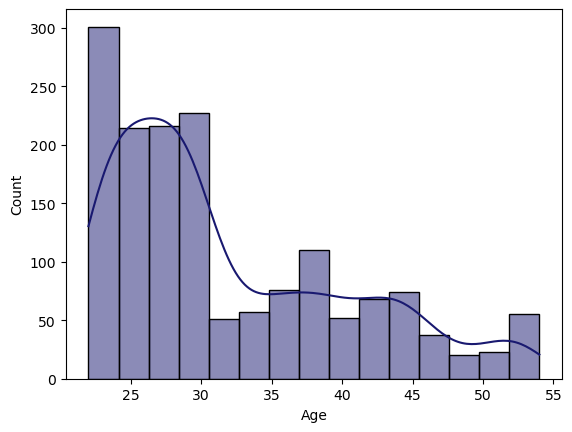

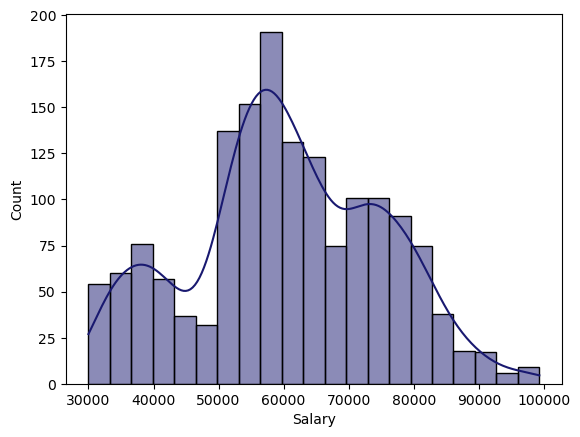

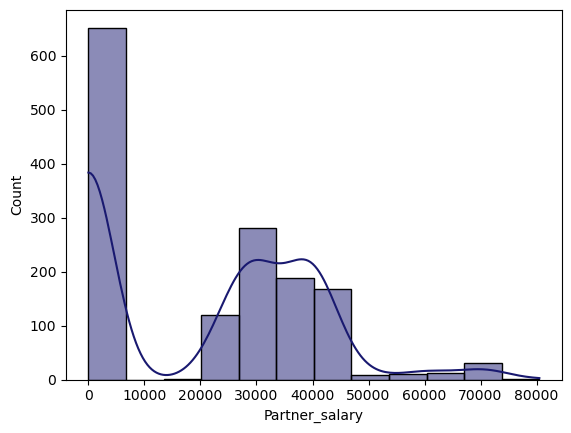

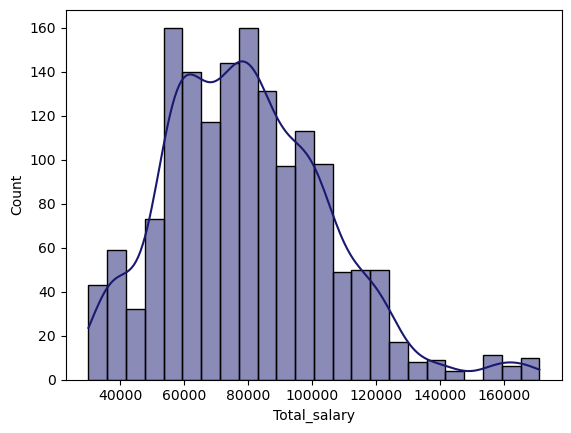

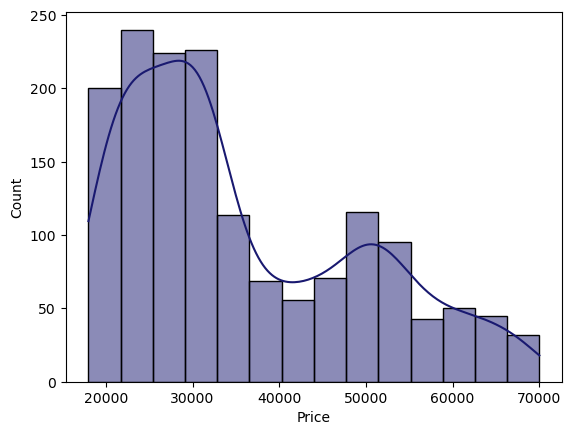

In [990]:
for i in num:
    sns.histplot(data=austo,x=austo[i],kde=True,color='midnightblue')
    plt.show()

On performing a univariate analysis on the numerical columns, the general observations are:
- Most of the customers are young, being 25-30 years old
- Most customers have salary ranging from 50k to 70k
- Considerable amount of customers do not have working partners, and those who do have, have salary around 30k or 40k
- The total salary of the customers mostly range from 50k to 100k.
- Most of the cars sold have a price ranging from 20k to 35k

The business oriented observations are:
- Since most customers are young, could we develop a specific strategy to bring in middle aged and aged customers?
- Strategies to target low earning and high earning groups- preferred cars?
- For those who have working partners, high end cars can be sold? price vs total salary comparison
- Specifically for the customers whose salary>100k, what is the preferred car model? Are they having dependants?
- In spite of having customers with high salary, only the low priced cars are sold in high numbers. Why?

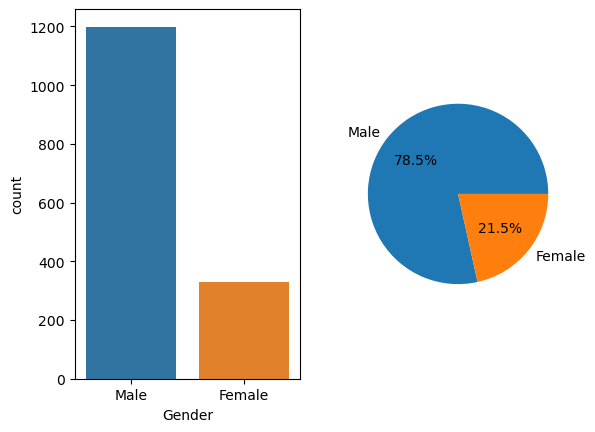

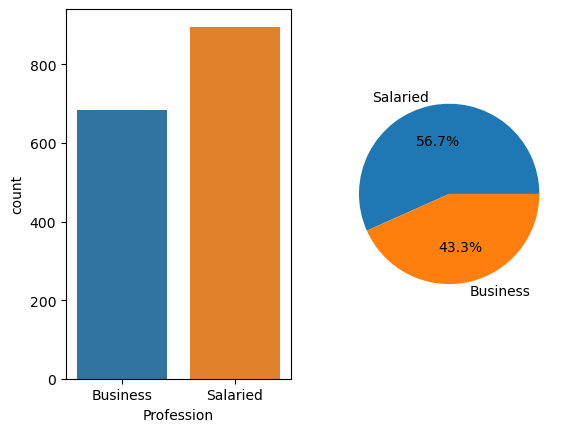

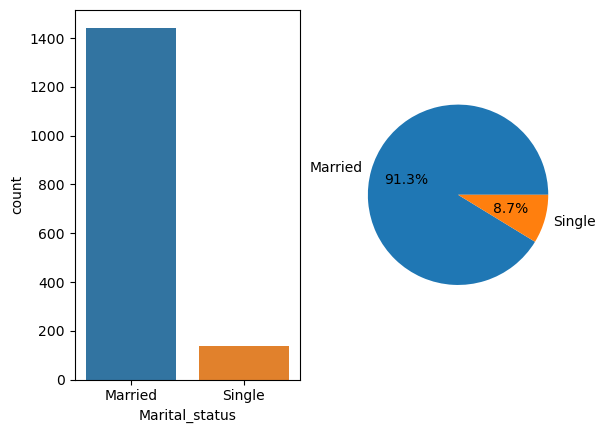

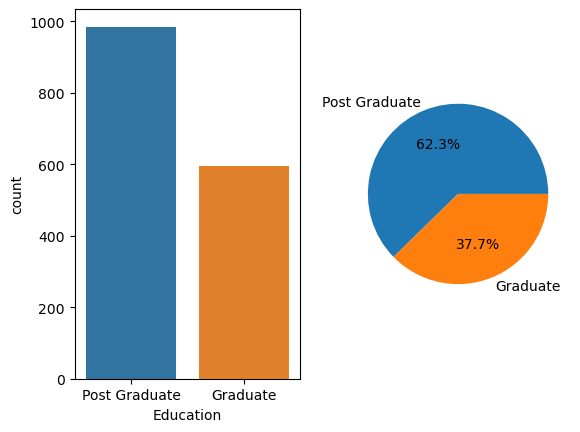

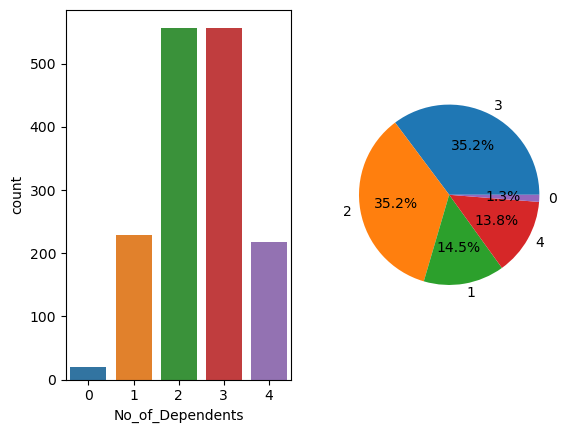

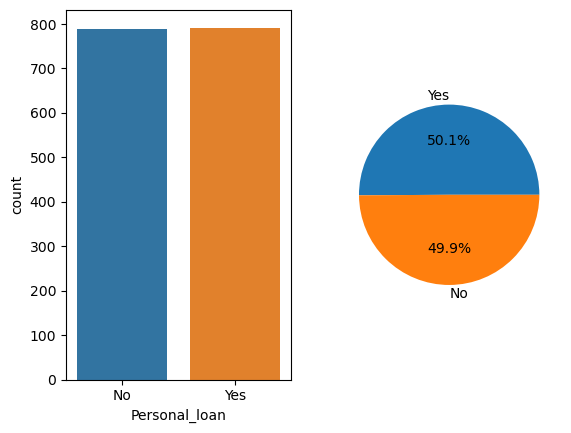

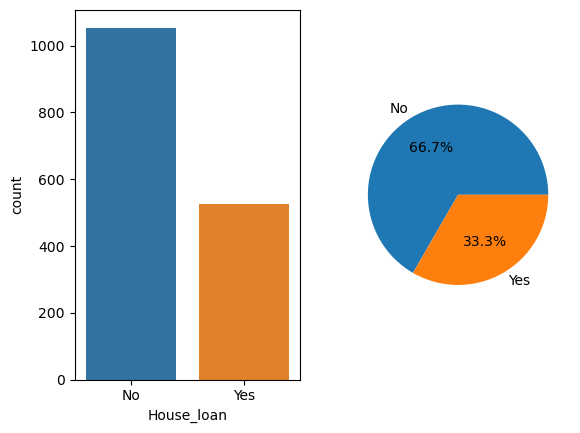

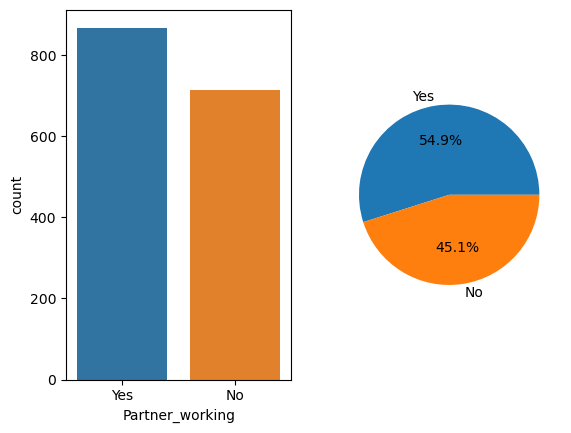

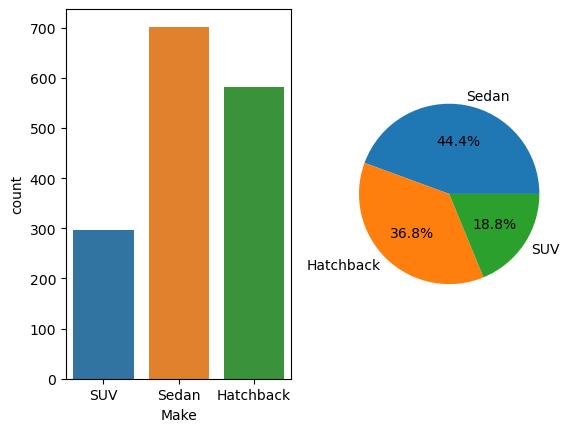

In [992]:
for i in cat:
    fig, axes= plt.subplots(ncols=2)
    sns.countplot(x=austo[i],ax=axes[0])
    axes[1].pie(austo[i].value_counts(), labels=austo[i].value_counts().index,autopct='%1.1f%%')
    plt.show()

On performing a univariate analysis on the categorical columns, the general observations are:
- Most of the customers are male,salaried and married
- There are mosre post graduates in the customer dataset
- More than 70% of the customers have 2 or more dependants
- Most of the customers have not availed a home loan
- Most customers prefer sedans over hatchback and suv

The business oriented observations are:
- Is there a link between salary and education level?
- what model do the customers with working partners and high total salary prefer?
- Since most customers do not have a home loan, their financial obligation is low, and hence may have a higher affordability. Can we upsell high end models to them?
- What is the average price of each car model? Which is the costliest? 
- Going by size, the SUVs are the most spacious. Since most customers have more than 2 dependants, their preference should be SUVs, which is not the case here. Why?

#### Bi and Multivariate analysis

From the univariate analysis, we have observed the need for the following analysis:
- Total salary vs price, hue-make, no of dependants,
- Car make vs price
- Age vs salary, hue- education
- age vs make
- make vs no of dependants
- make vs salary
- salary>100k vs model vs dependants
- home loan vs price , hue- model
- no of dependants and car make

### D. Understanding the relationships among the variables in the dataset is crucial for every analytical project. Perform analysis on the data fields to gain deeper insights. Comment on your understanding of the data. 

In this case, the goal is to identify the potential buyers by segmentation and then market the cars. For identification of potential buyers, affordability and necessity become the important parameters.
In general sense, affordability can be determined by:
-	Total Salary and working partners: Buying capacity, generally is proportional to the earning capacity, and hence it is reasonable to have an initial assumption that groups with higher salaries can afford premium models and higher priced cars
-	Lesser liabilities: The customers who have lesser liabilities, like loans, have better affordability
Necessity can be assessed by:
-	Marital status- Married customers might need bigger sized cars than single customers
-	No of dependents- Higher the number of dependents, greater is the need for a bigger sized model

In addition to this, a few other comparisons might help in the analysis:
-	Education level, salary and price of car owned
-	Gender, age and price comparison

If we assume that the profit of the company is proportional to the price of the car, then price becomes the target variable here. 


<AxesSubplot:xlabel='Total_salary', ylabel='Price'>

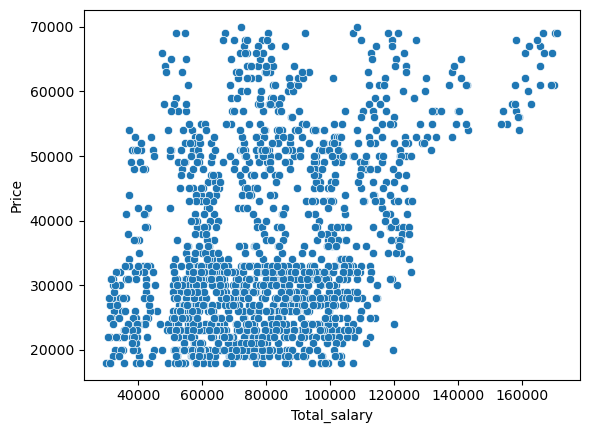

In [998]:
sns.scatterplot(x=austo['Total_salary'],y=austo['Price'])

<AxesSubplot:xlabel='Gender', ylabel='Price'>

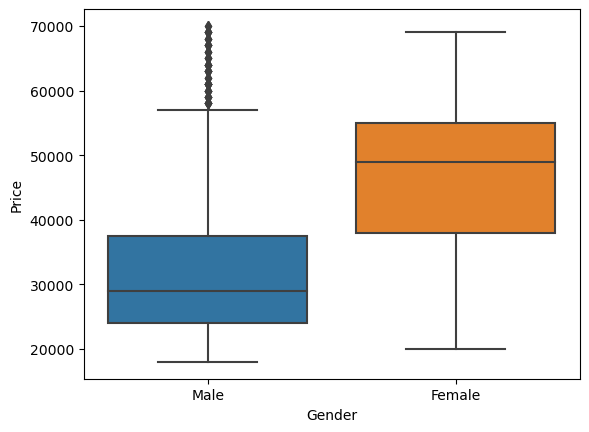

In [999]:
sns.boxplot(x=austo['Gender'],y=austo['Price'])

<AxesSubplot:xlabel='Marital_status', ylabel='Price'>

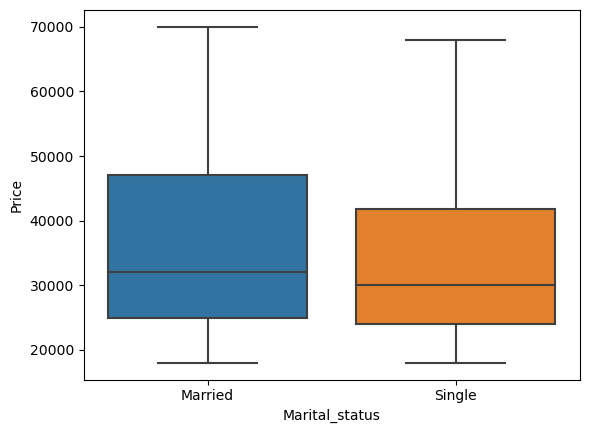

In [1000]:
sns.boxplot(x=austo['Marital_status'],y=austo['Price'])

<AxesSubplot:xlabel='No_of_Dependents', ylabel='Price'>

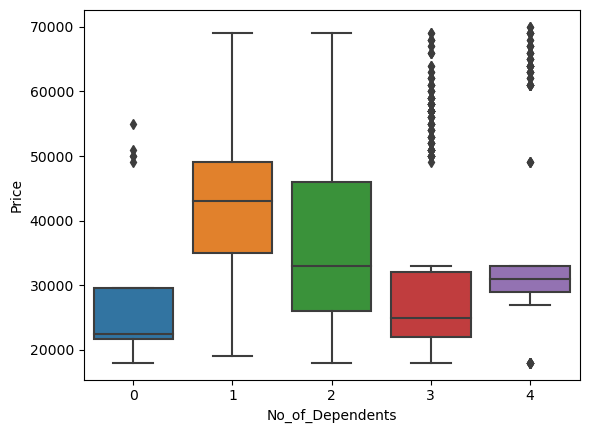

In [1001]:
sns.boxplot(x=austo['No_of_Dependents'],y=austo['Price'])

<AxesSubplot:xlabel='Personal_loan', ylabel='Price'>

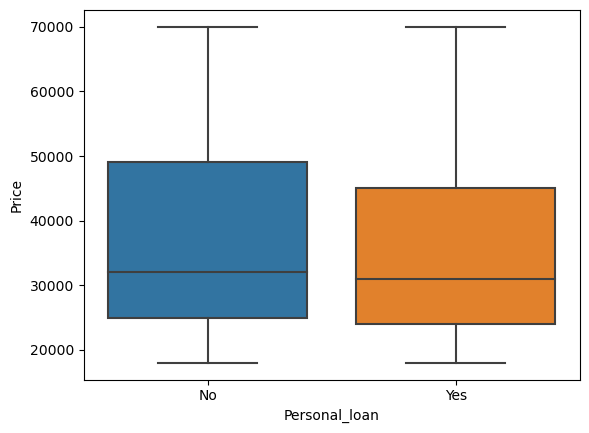

In [1002]:
sns.boxplot(x=austo['Personal_loan'],y=austo['Price'])

<AxesSubplot:xlabel='House_loan', ylabel='Price'>

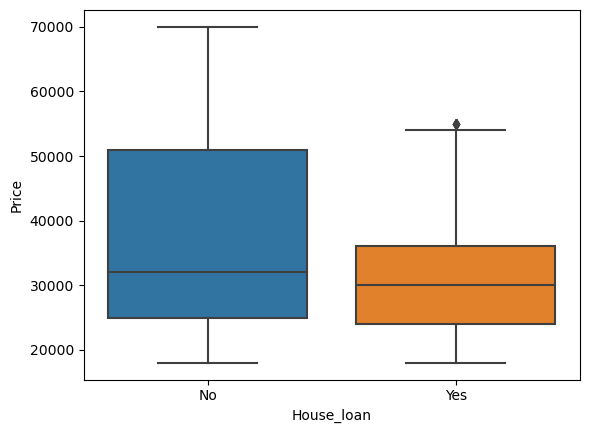

In [1003]:
sns.boxplot(x=austo['House_loan'],y=austo['Price'])

<AxesSubplot:xlabel='Partner_working', ylabel='Price'>

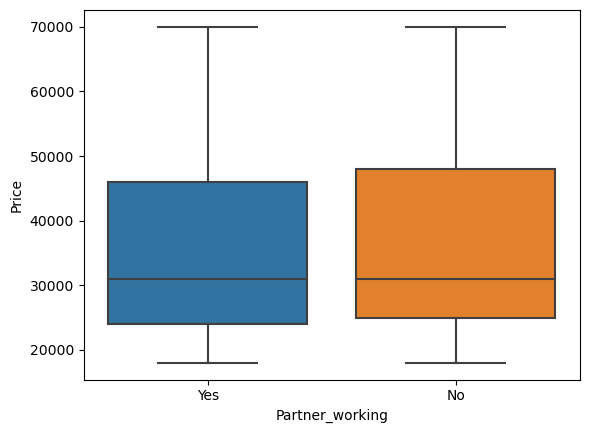

In [1004]:
sns.boxplot(x=austo['Partner_working'],y=austo['Price'])

<AxesSubplot:>

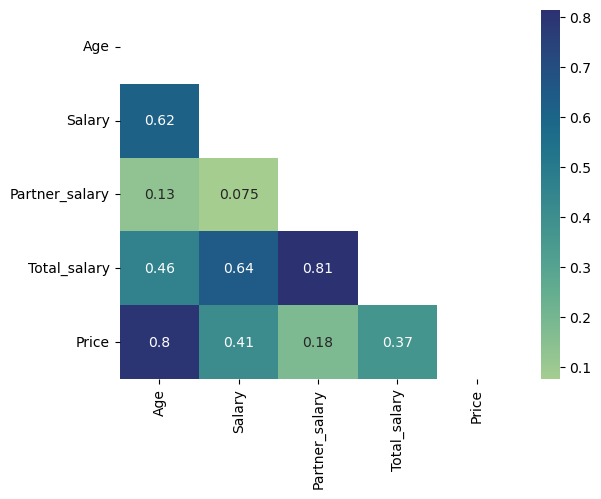

In [933]:
mask=np.triu(np.ones_like(austo.corr(),dtype=bool))
sns.heatmap(austo.corr(),annot=True,cmap='crest',mask=mask)

From the heatmap, it can be observed that:
- There is a high correlation between the price and age. That is the aged people tend to prefer high priced cars. However, in univariate analysis, we found that the no of aged customers is less. There should be a specific strategy for this group.

<AxesSubplot:xlabel='Age', ylabel='Price'>

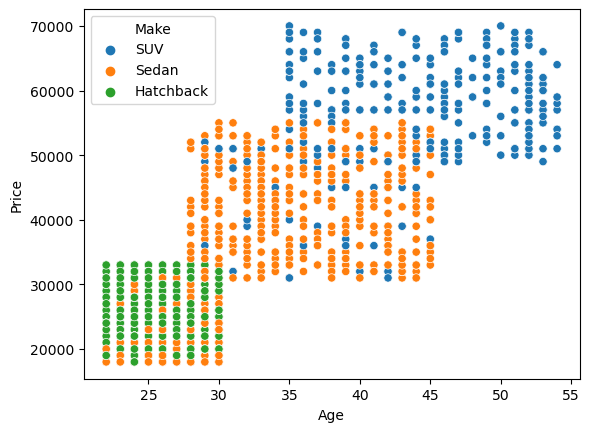

In [934]:
sns.scatterplot(x=austo['Age'],y=austo['Price'],hue=austo['Make'],ci=False)

From the above, it can be observed that:
- People above  30 do not own hatchbacks and people above 45 perfer only SUVs

<AxesSubplot:xlabel='Gender', ylabel='Price'>

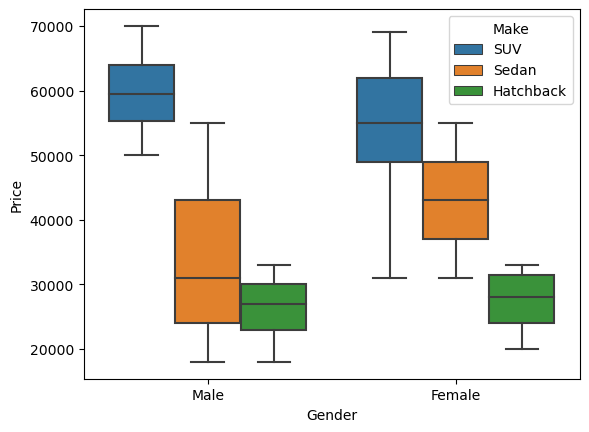

In [1006]:
sns.boxplot(x=austo['Gender'],y=austo['Price'],hue=austo['Make'])

<AxesSubplot:xlabel='Make', ylabel='Price'>

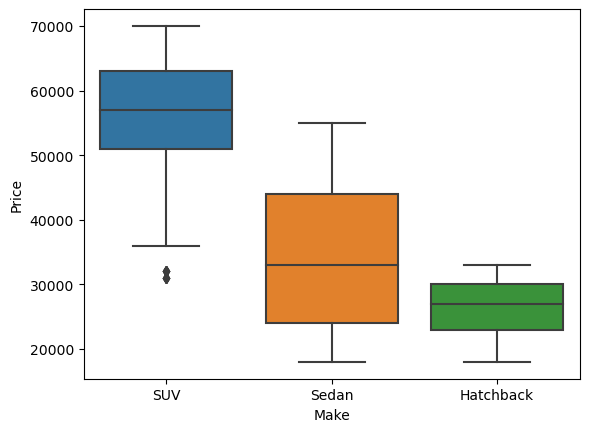

In [935]:
sns.boxplot(x=austo['Make'],y=austo['Price'])

It can be seen that SUVs are the costliest and hatchbacks are the cheapest.

<AxesSubplot:xlabel='Age', ylabel='Salary'>

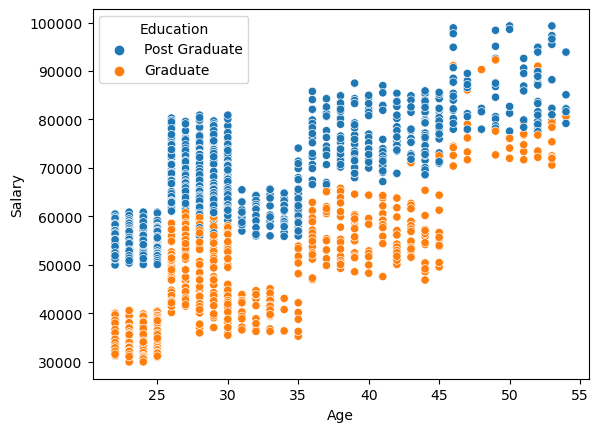

In [936]:
sns.scatterplot(x=austo['Age'],y=austo['Salary'],hue=austo['Education'])

<AxesSubplot:xlabel='Education', ylabel='Salary'>

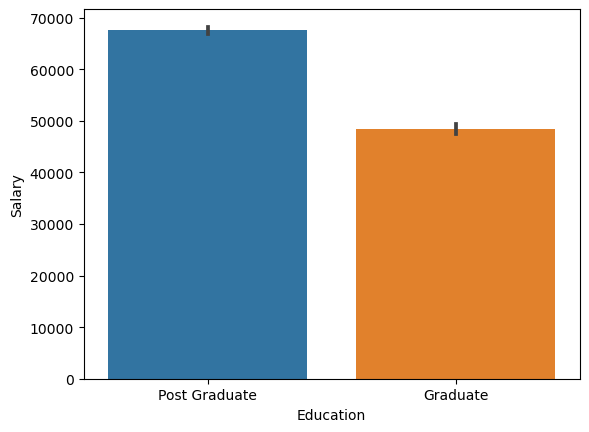

In [937]:
sns.barplot(x=austo['Education'],y=austo['Salary'])

<AxesSubplot:xlabel='Age', ylabel='Salary'>

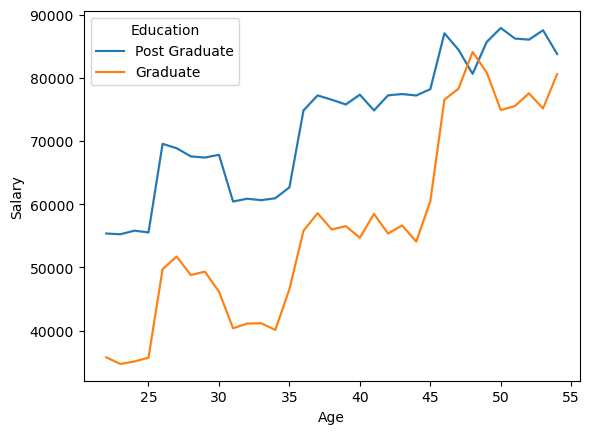

In [938]:
sns.lineplot(x=austo['Age'],y=austo['Salary'],hue=austo['Education'],ci=False)

There is a clear correlation between education and salary. Across all age groups, the postgraduates tend to have higher salries

<AxesSubplot:xlabel='Education', ylabel='Price'>

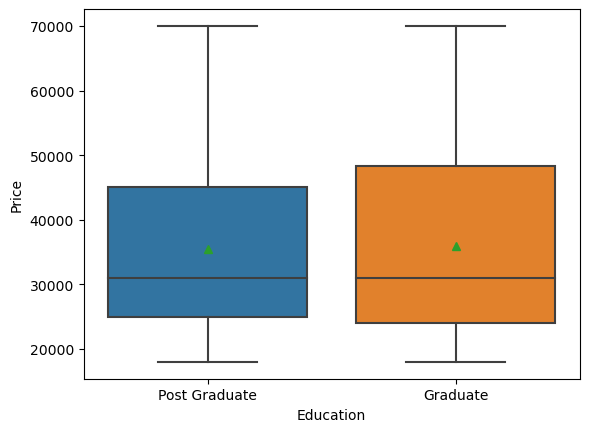

In [939]:
sns.boxplot(x=austo['Education'],y=austo['Price'],showmeans=True)

Despite having higher salaries, the post graduate customers opt for the cars with the same price as the graduates do

<AxesSubplot:xlabel='Total_salary', ylabel='Price'>

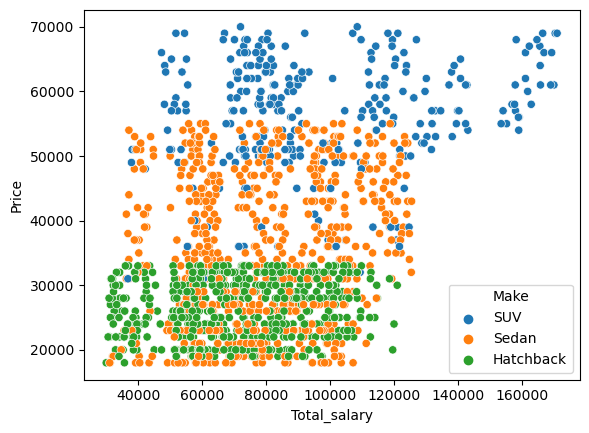

In [940]:
sns.scatterplot(x=austo['Total_salary'],y=austo['Price'],hue=austo['Make'],ci=False)

<AxesSubplot:xlabel='Marital_status', ylabel='Price'>

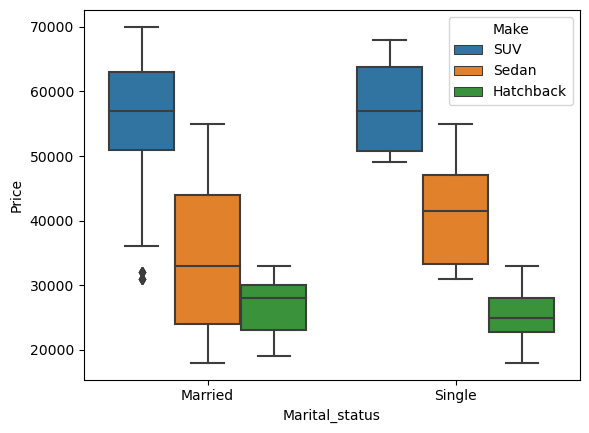

In [1007]:
sns.boxplot(x=austo['Marital_status'],y=austo['Price'],hue=austo['Make'])

<AxesSubplot:xlabel='No_of_Dependents', ylabel='Price'>

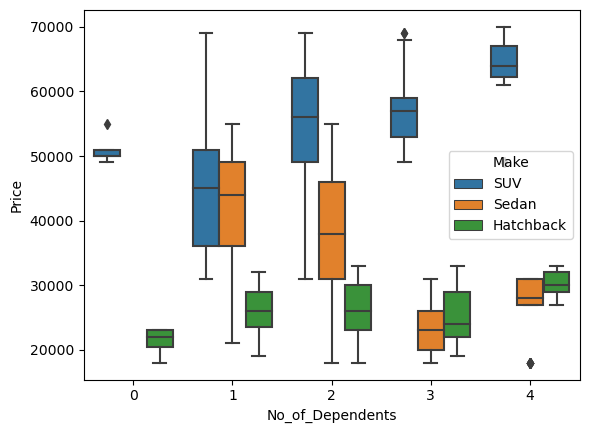

In [1008]:
sns.boxplot(x=austo['No_of_Dependents'],y=austo['Price'],hue=austo['Make'])

### E. Employees working on the existing marketing campaign have made the following remarks. Based on the data and your analysis state whether you agree or disagree with their observations. Justify your answer Based on the data available.

E1) Steve Roger says “Men prefer SUV by a large margin, compared to the women”

E2) Ned Stark believes that a salaried person is more likely to buy a Sedan.

E3) Sheldon Cooper does not believe any of them; he claims that a salaried male is an easier target for a SUV sale over a Sedan Sale.

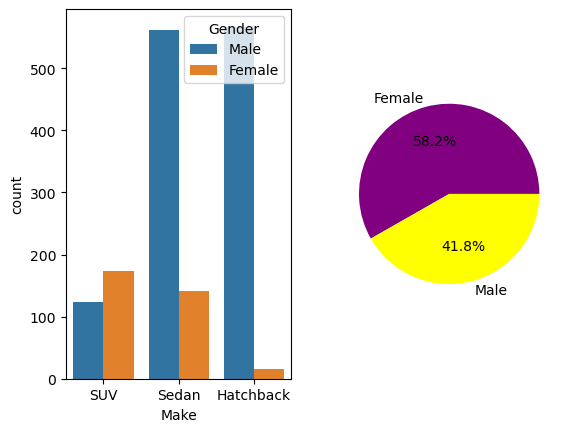

In [941]:
fig,axes=plt.subplots(ncols=2)
sns.countplot(x=austo['Make'],hue=austo['Gender'],ax=axes[0])
axes[1].pie(x=austo[austo['Make']=='SUV']['Gender'].value_counts(),labels=austo[austo['Make']=='SUV']['Gender'].value_counts().index,autopct='%1.1f%%',colors=['purple','yellow']);

E1) It is evident that the observation made by Steve Roger is incorrect. Amongst the makes, women prefer SUV more than men. From the pie chart above, it can be seen that 58.2% of women prefer SUVs, whereas only 41.8% of the men prefer the same.

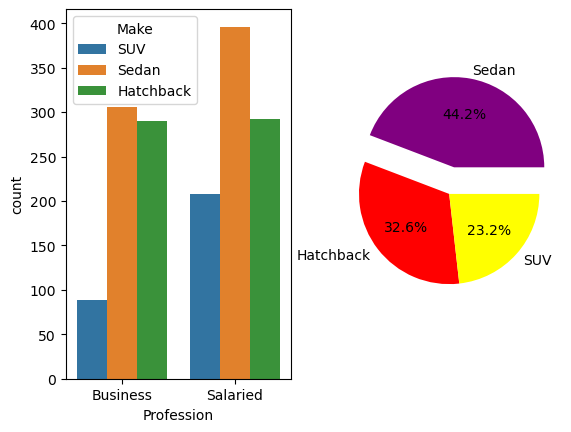

In [942]:
fig,axes=plt.subplots(ncols=2) 
sns.countplot(x=austo['Profession'],hue=austo['Make'],ax=axes[0])
axes[1].pie(x=austo[austo['Profession']=='Salaried']['Make'].value_counts(),labels=austo[austo['Profession']=='Salaried']['Make'].value_counts().index,autopct='%1.1f%%',colors=['purple','red','yellow'],explode=[0.3,0,0]);

E2) The observation of Ned Stark that a salaried person is most likely to buy a Sedan is right as evident from the above graphs

<AxesSubplot:xlabel='Make'>

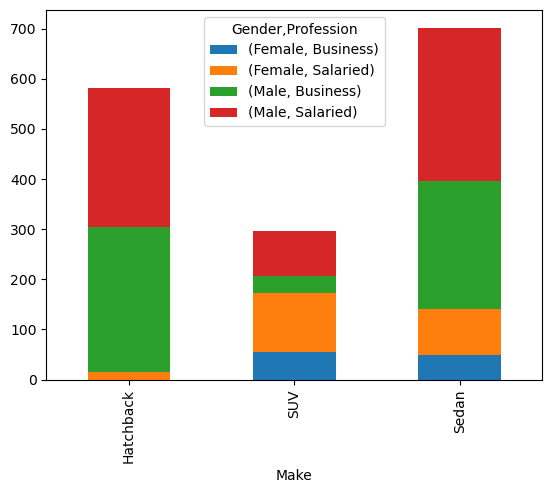

In [943]:
ct=pd.crosstab(index=[austo['Make']],columns=[austo['Gender'],austo['Profession']])
ct.plot(kind='bar',stacked=True)

E3) From the above, it can be inferres that the Salaried male prefers Sedan over SUV. Hence, Sheldon Cooper's observation is not true.

### F. From the given data, comment on the amount spent on purchasing automobiles across the following categories. Comment on how a Business can utilize the results from this exercise. Give justification along with presenting metrics/charts used for arriving at the conclusions.

Give justification along with presenting metrics/charts used for arriving at the conclusions.

F1) Gender

F2) Personal_loan

<AxesSubplot:xlabel='Gender', ylabel='Price'>

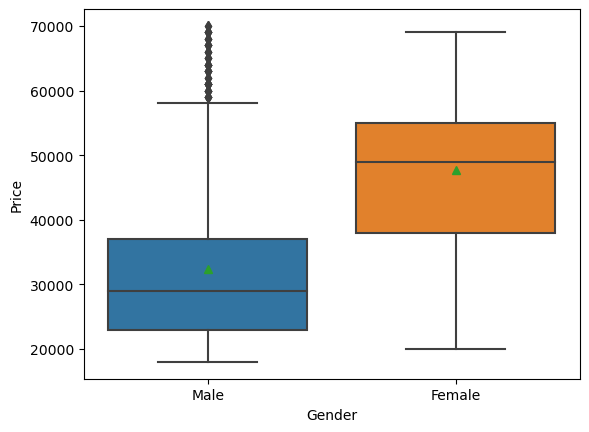

In [944]:
sns.boxplot(x=austo['Gender'],y=austo['Price'],showmeans=True)

In [945]:
austo.groupby(austo['Gender'])['Price'].mean()

Gender
Female    47705.167173
Male      32416.134185
Name: Price, dtype: float64

F1) From the above, it can be inferred that the female customers are more likely to spend higher amounts on the purchase of a car, as compared to the male customers. The median value of price for females is 48000, whereas for males, it is 29000. However, when looking at the customer data, there are more males than females. Hence, a special discount or offer for female customers can bring in more business to the store.

<AxesSubplot:xlabel='Personal_loan', ylabel='Price'>

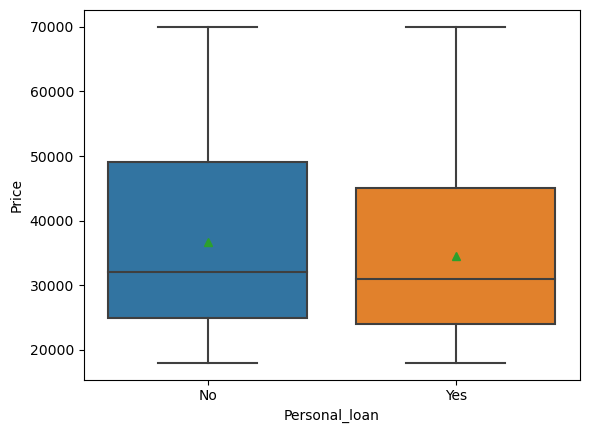

In [946]:
sns.boxplot(x=austo['Personal_loan'],y=austo['Price'],showmeans=True)

F2) The personal loan availment status doesn't seem to make much of a difference in the price of the car

### G.From the current data set comment if having a working partner leads to the purchase of a higher-priced car.

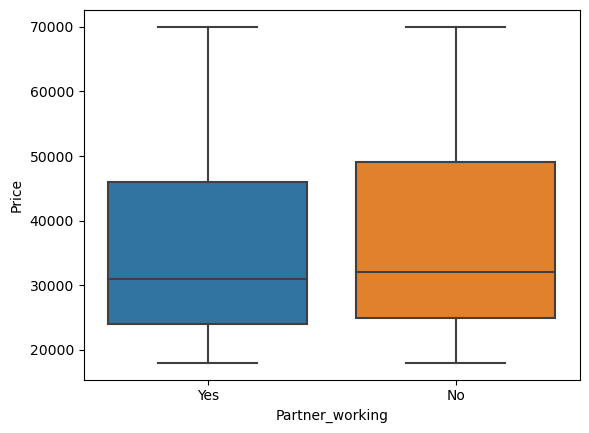

In [947]:
sns.boxplot(x=austo[austo['Marital_status']=='Married']['Partner_working'],y=austo['Price']);

The working status of partner does not seem to influence the price of the car bought as seen from the above barplot.

### H. The main objective of this analysis is to devise an improved marketing strategy to send targeted information to different groups of potential buyers present in the data. For the current analysis use the Gender and Marital_status - fields to arrive at groups with similar purchase history.

In [948]:
austo.groupby(['Gender','Marital_status']).Price.median()

Gender  Marital_status
Female  Married           49000.0
        Single            46000.0
Male    Married           29000.0
        Single            28000.0
Name: Price, dtype: float64

In [949]:
pt=pd.pivot_table(data=austo,index='Gender',columns='Marital_status',values='Price',aggfunc=np.median)

<AxesSubplot:xlabel='Gender'>

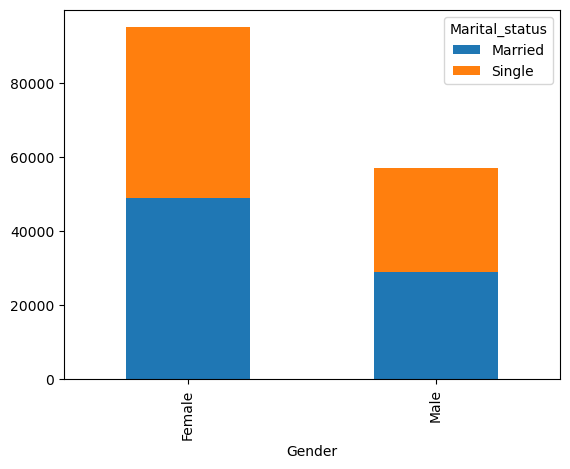

In [950]:
pt.plot(kind='bar',stacked=True)

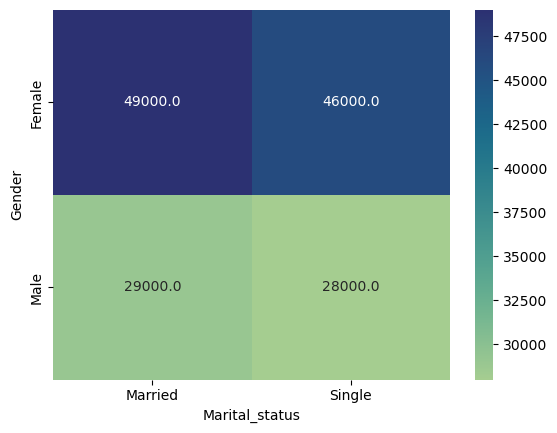

In [951]:
sns.heatmap(pt,cmap='crest',annot=True,fmt='.1f');

<AxesSubplot:ylabel='Price'>

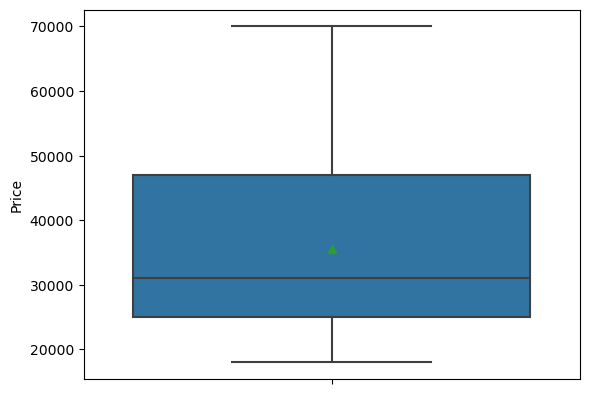

In [952]:
sns.boxplot(y=austo['Price'],showmeans=True)

<AxesSubplot:xlabel='Gender,Marital_status'>

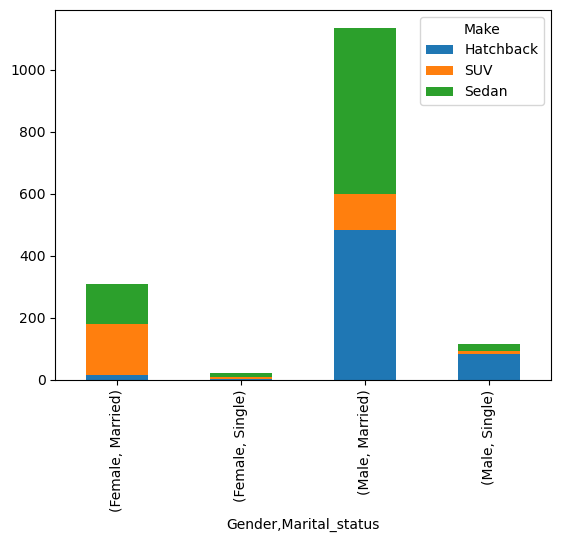

In [953]:
pt1=pd.pivot_table(data=austo,index=['Gender','Marital_status'],columns=austo['Make'],values='Make',aggfunc='count')
pt1.plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='Make', ylabel='Price'>

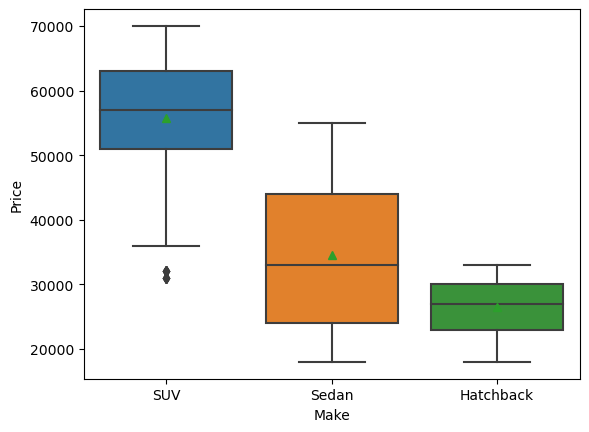

In [954]:
sns.boxplot(y=austo['Price'],x=austo['Make'],showmeans=True)

In [955]:
austo.groupby('Gender').Price.median()

Gender
Female    49000.0
Male      29000.0
Name: Price, dtype: float64

In [956]:
austo.groupby('Marital_status').Price.median()

Marital_status
Married    32000.0
Single     30000.0
Name: Price, dtype: float64

In [957]:
austo.groupby('Marital_status')['Marital_status'].value_counts()

Marital_status  Marital_status
Married         Married           1443
Single          Single             138
Name: Marital_status, dtype: int64

In [958]:
austo.groupby('Make').Price.median()

Make
Hatchback    27000.0
SUV          57000.0
Sedan        33000.0
Name: Price, dtype: float64

In [959]:
ct2=pd.crosstab(index=[austo['Make'],austo['No_of_Dependents']],columns=austo['Marital_status'])
ct2

Marital_status              Married  Single
Make      No_of_Dependents                 
Hatchback 0                       0      15
          1                      10       1
          2                     113      68
          3                     256       0
          4                     119       0
SUV       0                       0       5
          1                      34       0
          2                      76      11
          3                     117       0
          4                      54       0
Sedan     1                     171      13
          2                     264      25
          3                     184       0
          4                      45       0

<AxesSubplot:xlabel='Marital_status', ylabel='Make-No_of_Dependents'>

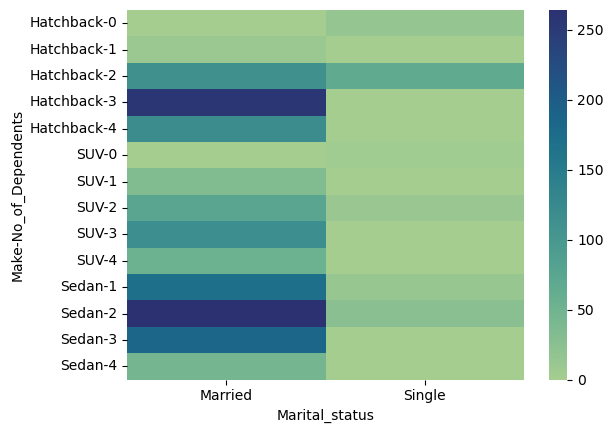

In [960]:
sns.heatmap(ct2,cmap='crest')

<Figure size 1000x1000 with 0 Axes>

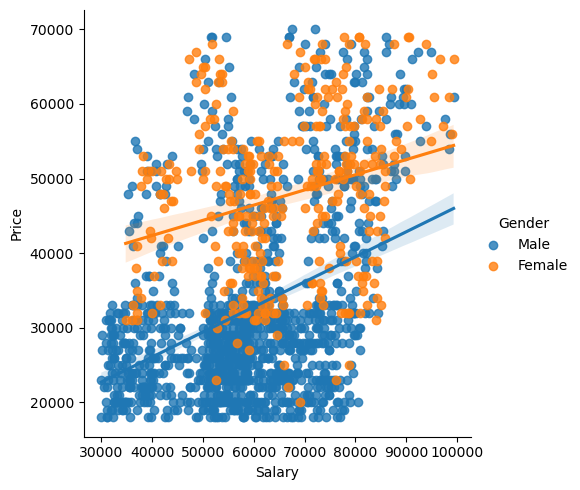

In [961]:
plt.figure(figsize=(10,10))
sns.lmplot(data=austo,x='Salary',y='Price',hue='Gender')

On exploring the data given the following are a few observations and actionable insights, consequent to a deeper analysis of the gender and marital status fields:
- The price field has extreme values and is right skewed. Hence, the median of the price across categories was chosen for the sake of comparison. On examining the above graphs, where a crosstab comparison was made for the different combinations of Gender and marital status, we find that the median price for married females are the highest. This is then followed by single females, married males and single males in that order. 
- Assuming profit of the company is proportional to the price, the primary focus is on the married female category. We have already seen that the SUV is the priciest of the three models.From the above bar graph, it is evident that the married females are more interested in buying the SUVs, probably owing to the spacious nature. This category should be the primary target group.
- In general as per the data, females are more inclined to buy a higher priced car. Hence, the company must focus on special offers and promotions targeting them.
- Based on the marital status, we find that the median price for married customers is slightly higher than the single customers. On exploring the make for these and constructing a crosstab, we find that a significant portion of the married customers, with 3 dependents are using the hatchback model. Hatchbacks are ideal for single persons or a small family and are the least pricey. Hence, efforts could be made to upsell a sedan for these customers.
- On exploring the data, we find that the customer base has only 8.7% of single customers. Efforts could be made to draw in more customers from this category. This is to achieve profit not by price, but by volume of sales.


# Case 2: GODIGT Bank

## Loading and viewing Dataset

In [962]:
godigt=pd.read_excel('godigt_cc_data.xlsx')

In [963]:
godigt.shape

(8448, 28)

The given dataset has 8448 rows and 28 columns.

In [964]:
godigt.head()

userid              card_no  card_bin_no Issuer   card_type  \
0       1  4384 39XX XXXX XXXX       438439   Visa        edge   
1       2  4377 48XX XXXX XXXX       437748   Visa  prosperity   
2       3  4377 48XX XXXX XXXX       437748   Visa     rewards   
3       4  4258 06XX XXXX XXXX       425806   Visa   indianoil   
4       5  4377 48XX XXXX XXXX       437748   Visa        edge   

  card_source_date high_networth  active_30  active_60  active_90  ...  \
0       2019-09-29             B          0          1          1  ...   
1       2002-10-30             A          1          1          1  ...   
2       2013-10-05             C          0          0          0  ...   
3       1999-06-01             E          0          1          1  ...   
4       2006-06-13             B          1          1          1  ...   

   bank_vintage  T+1_month_activity  T+2_month_activity T+3_month_activity  \
0            27                   0                   0                  0   
1            52                   0                   0                  0   
2            23                   1                   0                  0   
3            49                   0                   0                  1   
4            21                   1                   0                  0   

   T+6_month_activity  T+12_month_activity  Transactor_revolver  \
0                   0                    0                    T   
1                   0                    0                    R   
2                   0                    0                    R   
3                   0                    0                    T   
4                   0                    0                    T   

  avg_spends_l3m  Occupation_at_source  cc_limit  
0          27729         Self Employed    290000  
1         280854                     0    950000  
2          70587               Student    210000  
3           9156         Self Employed     80000  
4          38108              Salaried    220000  

[5 rows x 28 columns]

## Data Description

In [965]:
godigt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

There are 27 fields, of which 2 variables are id fields, 1 date field, 2 numerical fields and the rest are categorical in nature, of which 8 are object fields

Based on the problem description, the bank wants to maximise the credit card usage by matching the right card as per the customer requirements. Hence the target variable here could be average spend, which can be achieved by changes in the card_type and cc_limit fields. Having these as target variables, the predictor variables would be high_networth,cumulative of cc active, month activities, transactor revolver and occupation at source for card type, and annual income, high networth for cc limit

In [966]:
round(godigt.describe(include='all').T,2)

count unique                  top  freq      first  \
userid                   8448.0    NaN                  NaN   NaN        NaT   
card_no                    8448     11  4262 41XX XXXX XXXX  2084        NaT   
card_bin_no              8448.0    NaN                  NaN   NaN        NaT   
Issuer                     8448      3                 Visa  7279        NaT   
card_type                  8448     15              rewards  1502        NaT   
card_source_date           8448   5186  2008-12-04 00:00:00     6 1998-07-24   
high_networth              8448      5                    A  1740        NaT   
active_30                8448.0    NaN                  NaN   NaN        NaT   
active_60                8448.0    NaN                  NaN   NaN        NaT   
active_90                8448.0    NaN                  NaN   NaN        NaT   
cc_active30              8448.0    NaN                  NaN   NaN        NaT   
cc_active60              8448.0    NaN                  NaN   NaN        NaT   
cc_active90              8448.0    NaN                  NaN   NaN        NaT   
hotlist_flag               8448      2                    N  8410        NaT   
widget_products          8448.0    NaN                  NaN   NaN        NaT   
engagement_products      8448.0    NaN                  NaN   NaN        NaT   
annual_income_at_source  8448.0    NaN                  NaN   NaN        NaT   
other_bank_cc_holding      8448      2                    Y  4728        NaT   
bank_vintage             8448.0    NaN                  NaN   NaN        NaT   
T+1_month_activity       8448.0    NaN                  NaN   NaN        NaT   
T+2_month_activity       8448.0    NaN                  NaN   NaN        NaT   
T+3_month_activity       8448.0    NaN                  NaN   NaN        NaT   
T+6_month_activity       8448.0    NaN                  NaN   NaN        NaT   
T+12_month_activity      8448.0    NaN                  NaN   NaN        NaT   
Transactor_revolver        8410      2                    T  7115        NaT   
avg_spends_l3m           8448.0    NaN                  NaN   NaN        NaT   
Occupation_at_source       8448      6             Salaried  3918        NaT   
cc_limit                 8448.0    NaN                  NaN   NaN        NaT   

                              last            mean             std       min  \
userid                         NaT          4224.5      2438.87187       1.0   
card_no                        NaT             NaN             NaN       NaN   
card_bin_no                    NaT   436747.044508    30489.752417  376916.0   
Issuer                         NaT             NaN             NaN       NaN   
card_type                      NaT             NaN             NaN       NaN   
card_source_date        2020-06-17             NaN             NaN       NaN   
high_networth                  NaT             NaN             NaN       NaN   
active_30                      NaT        0.292377        0.454881       0.0   
active_60                      NaT        0.494792        0.500002       0.0   
active_90                      NaT        0.642045        0.479427       0.0   
cc_active30                    NaT        0.284091        0.451007       0.0   
cc_active60                    NaT        0.484493        0.499789       0.0   
cc_active90                    NaT        0.632339        0.482197       0.0   
hotlist_flag                   NaT             NaN             NaN       NaN   
widget_products                NaT        3.614583        2.273193       0.0   
engagement_products            NaT        3.991122        2.572135       0.0   
annual_income_at_source        NaT  1674594.738991  1064307.092586  200095.0   
other_bank_cc_holding          NaT             NaN             NaN       NaN   
bank_vintage                   NaT       33.164181       15.868344       6.0   
T+1_month_activity             NaT        0.111269        0.314483       0.0   
T+2_month_activity       

The following are the observations from the given data:
- The annual income of customers range from 200095 to 4999508, with a mean income of 1674594.74 and a median of 1372133.5. There is a possible right skew here owing to the presence of outliers
- There are people who do have not spent at all for the past 3 months. These are the primary target groups. The goal is to increase their spending and prevent attrition by offering incentives, card type change etc. 
- The average spends mean is 49527, as against the cc limit mean of 251706.91, which when looked at superficially means that the customers utilize onlt 20% of their limits. This has to be investigated
- On comparing the spends columns and the limit column, there is a clear gap. People are offered more limits than what they actally spend. This has to be investigated.
- When we look at the t+ months activity, we find that the activity keeps decreasing from t+1 until it is almost 0 at t+12. Why is this?
- The customers have been associated with the bank for a minimum period of  months and a maximum period of 5 years, with most of them atleast 30 months associated with the bank.

Initial insights:
- Can we develop some kind of scoring metric to rate the customer so that a potential priority list can be formed?
- Are customers not utilizing the limit here because of the other bank cc? - spend vs other bnk cc
- Customers who are not using the savings account likely to not use the cc as well. Is this assumption right? Does this mean customer inactivity and attrition at the bank level, and not just the product level?- active vs cc active, active acc vs engagement
- Are customers with high widget products more or less likely to have better usage?- Are they opting for other payment options eg. wallet/netbanking rather than using cc?
- Are the high engagement customers vintage customers?- What is their usage? vintage vs engagement vs usage
- How does income affect spending? annual income vs spend
- Are cc limits being determined by annual income? cc vs income
- spends vs limit comparison- Are limits properly utilized?- can we construct another column- spend/limit ratio to determine the people who have very minimal usage? And then target them?
- Which category spends the most? T or R? 
- What is the distribution of T and R? If we assume that T type have better cash flow, they may be using the cc only during certain periods, like when there are cc related offers in shopping etc. Is this the case?
- which is the most used card type for t and r?
- Are HNIs being given the right limit and card type?- HNI vs Limit vs card type
- Which card type holders have maximum utilization? Can we push that particular type of card to everyone else? Is there a particular card type with very minimal spending? If so, why? limits vs card type vs spend
- Which occupation type people use the most and least? Why? What is their transaction type? occ vs spend vs t/r
- Are hotlisted cards being used? Is there any fraudulant activity?
- Have the customers who have hotlisted their cards done so due to non usage? What type of cards are these? type vs usage vs hotlisted
- How does the usage vary with bank vintage? vintage vs usage
- On what basis are card types issued- income? engagement? HNI?
- Is networth determined by annual income?

## Data Pre-Processing

- As seen above, there is a null category in the occupation field. This number is quite small. So for the purpose of this analysis, we can either impute with the mode or consider it as a separate category. Here we'll consider it as a separate category
- Also the t/r field has null values for hotlisted cards, which is appropriate

Dropping the rows with hotlist = y will not have a major impact on the other values.Hence dropping it and the column hotlist as well.

## Data Visualization

### Univariate Analysis

Observations:
- Outliers in annual income, cc limit and spend making the data right skewed
- Distribution of spends and limit similar to each other
- Most of the people spend less than 50% of their limit

Obsrvations:
- Visa is the most prevalant issuer
- rewards is the most occuring and platinum is the least occuring card type
- Almost equal distribution of people with different networths in the dataset. A is slightly higher than the rest
- More than half of the custoemrs using more than 3 widgets
- More than half the customers using more than 3 engagement products
- More than half the cusotmers holding other bank cc
- More than 80% are transactor type- using cc probably for  periodic offers and not for the sake of cash flow. 
- Most customers are salaried
- Most of the customers do not have active accounts. Why is this? Bank level attrition?
- T+ activity is majorly 0? Why?

### Bivariate Analysis

- The top 5 card types in terms of spend ratio are indianoil, aura, shoprite, rewards, cashback. The top 5 cards in terms of the number of times of usage are platinum, pulse, indianoil, cashback, edge
- The least used card type in terms of spend ratio are platinum, elite, pulse,prosperity, chartered and that in terms of times of use are- aura, shoprite,centurion, gold, elite
- The t+activity chart shows that the prime, chartered, shoprite,elite and gold type cards are nit being used
- Looking at this the card type may not be the reason for attrition, but still, the customers having gold, elite, shoprite could be considered for improvement 
- Also, the limit might not be the reason for less usage as all the card type holders have a median spend ratio less tha 50%

The fact that customers are holding other ban credit cards is not relevant to their card usage, as seen above

2597 ie. 30.87% of people who do not have transaction activity for 12 months, also do not have account activity. Of these 2597, 999 have not had a credit card activity for the entire 15 months under consideration

Widget products do not seem to have any influence over the usage

Engagement products do not seem to be influencing non usage

In [1009]:
gd_df2=godigt.copy()

In [1010]:
gd_df2['card_activity']=(8*gd_df2['T+12_month_activity'])+(4*gd_df2['T+1_month_activity'])+(5*gd_df2['T+2_month_activity'])+(6*gd_df2['T+3_month_activity'])+(7*gd_df2['T+6_month_activity'])+(1*gd_df2['cc_active30'])+(2*gd_df2['cc_active60'])+(3*gd_df2['cc_active90'])
gd_df2['ac_active']=(1*gd_df2['active_30'])+(2*gd_df2['active_60'])+(3*gd_df2['active_90'])
gd_df2['spend ratio']=gd_df2['avg_spends_l3m']/gd_df2['cc_limit']
gd_df2.drop(gd_df2[gd_df2['hotlist_flag']=='Y'].index,inplace=True)
gd_df2=gd_df2.reset_index(drop=True)
gd_df2.drop('hotlist_flag',axis=1,inplace=True)
gd_df2.drop(['T+12_month_activity','T+1_month_activity','T+2_month_activity','T+3_month_activity','T+6_month_activity'],axis=1,inplace=True)
gd_df2.drop(['active_30','active_60','active_90','cc_active30','cc_active60','cc_active90'],axis=1,inplace=True)

In [1012]:
gd_df2

userid              card_no  card_bin_no Issuer   card_type  \
0          1  4384 39XX XXXX XXXX       438439   Visa        edge   
1          2  4377 48XX XXXX XXXX       437748   Visa  prosperity   
2          3  4377 48XX XXXX XXXX       437748   Visa     rewards   
3          4  4258 06XX XXXX XXXX       425806   Visa   indianoil   
4          5  4377 48XX XXXX XXXX       437748   Visa        edge   
...      ...                  ...          ...    ...         ...   
8405    8444  4262 41XX XXXX XXXX       426241   Visa   chartered   
8406    8445    37691 6XXXX XXXXX       376916   Amex   centurion   
8407    8446  4375 51XX XXXX XXXX       437551   Visa     rewards   
8408    8447  4477 47XX XXXX XXXX       447747   Visa   indianoil   
8409    8448  4262 41XX XXXX XXXX       426241   Visa     rewards   

     card_source_date high_networth  widget_products  engagement_products  \
0          2019-09-29             B                1                    3   
1          2002-10-30             A                4                    1   
2          2013-10-05             C                4                    2   
3          1999-06-01             E                6                    0   
4          2006-06-13             B                4                    3   
...               ...           ...              ...                  ...   
8405       2010-01-10             A                1                    0   
8406       2006-07-19             A                7                    4   
8407       2006-02-15             D                3                    0   
8408       2003-11-06             C                3                    0   
8409       2013-01-13             D                1                    1   

      annual_income_at_source other_bank_cc_holding  bank_vintage  \
0                     1552111                     Y            27   
1                     4833871                     Y            52   
2                     1345429                     N            23   
3                      880560                     N            49   
4                     1808582                     N            21   
...                       ...                   ...           ...   
8405                  3617288                     N            47   
8406                  3661676                     N            52   
8407                  1274059                     Y            36   
8408                  1271148                     N            54   
8409                  1329756                     Y            37   

     Transactor_revolver  avg_spends_l3m Occupation_at_source  cc_limit  \
0                      T           27729        Self Employed    290000   
1                      R          280854                    0    950000   
2                      R           70587              Student    210000   
3                      T            9156        Self Employed     80000   
4                      T           38108             Salaried    220000   
...                  ...             ...                  ...       ...   
8405                   T          108713                    0    970000   
8406                   T           42369             Salaried    200000   
8407                   T            8459              Retired     90000   
8408                   T           57100             Salaried    210000   
8409                   T           45244              Retired    130000   

      card_activity  ac_active  spend ratio  
0                 0          5     0.095617  
1                 0          6     0.295636  
2                 4          0     0.336129  
3                12          5     0.114450  
4                 9          6     0.173218  
...             ...        ...          ...  
8405              0          6     0.112075  
8406              5          5     0.211845  
8407              0          5     0.093989  
8408              4          0     0.271905  
8409            

In [1013]:
gd_df2.drop(['userid','card_no','card_bin_no','card_source_date'],axis=1,inplace=True)

In [1014]:
gd_df2

Issuer   card_type high_networth  widget_products  engagement_products  \
0      Visa        edge             B                1                    3   
1      Visa  prosperity             A                4                    1   
2      Visa     rewards             C                4                    2   
3      Visa   indianoil             E                6                    0   
4      Visa        edge             B                4                    3   
...     ...         ...           ...              ...                  ...   
8405   Visa   chartered             A                1                    0   
8406   Amex   centurion             A                7                    4   
8407   Visa     rewards             D                3                    0   
8408   Visa   indianoil             C                3                    0   
8409   Visa     rewards             D                1                    1   

      annual_income_at_source other_bank_cc_holding  bank_vintage  \
0                     1552111                     Y            27   
1                     4833871                     Y            52   
2                     1345429                     N            23   
3                      880560                     N            49   
4                     1808582                     N            21   
...                       ...                   ...           ...   
8405                  3617288                     N            47   
8406                  3661676                     N            52   
8407                  1274059                     Y            36   
8408                  1271148                     N            54   
8409                  1329756                     Y            37   

     Transactor_revolver  avg_spends_l3m Occupation_at_source  cc_limit  \
0                      T           27729        Self Employed    290000   
1                      R          280854                    0    950000   
2                      R           70587              Student    210000   
3                      T            9156        Self Employed     80000   
4                      T           38108             Salaried    220000   
...                  ...             ...                  ...       ...   
8405                   T          108713                    0    970000   
8406                   T           42369             Salaried    200000   
8407                   T            8459              Retired     90000   
8408                   T           57100             Salaried    210000   
8409                   T           45244              Retired    130000   

      card_activity  ac_active  spend ratio  
0                 0          5     0.095617  
1                 0          6     0.295636  
2                 4          0     0.336129  
3                12          5     0.114450  
4                 9          6     0.173218  
...             ...        ...          ...  
8405              0          6     0.112075  
8406              5          5     0.211845  
8407              0          5     0.093989  
8408              4          0     0.271905  
8409              0          5     0.348031  

[8410 rows x 15 columns]

In [1015]:
gd_df2['card_activity'].value_counts()

0     2461
6     1949
5     1427
3      986
4      296
10     289
9      253
11     190
12     162
7      120
8       44
15      40
14      33
16      26
13      24
17      20
19      15
21      14
18      13
24      11
20       9
27       6
23       5
25       4
29       3
30       3
22       2
26       2
32       2
31       1
Name: card_activity, dtype: int64

In [1016]:
1*1+2*1+3*1+4*1+5*1+6*1+7*1+8*1

36

- 4 months- 10
- 5 months- 15
- 6 months- 21
- 9 months- 28
- 15 months- 36



- recently active- last 6 months active-- >28,<=36
- active 6 mo ago- last 6 inactive, but active last 11 month-- >=10,<=28
- active 12 mo ago-last year inactive -- >6<10
- not active-- <=6

In [1017]:
gd_df2['usage_status']=''

In [1018]:
gd_df2.loc[gd_df2['card_activity']>28,'usage_status']='high duration and frequency'

In [1019]:
gd_df2.loc[(gd_df2['card_activity']<=28) & (gd_df2['card_activity']>=10),'usage_status']='moderate duration and frequency'

In [1020]:
gd_df2.loc[(gd_df2['card_activity']<10) & (gd_df2['card_activity']>6),'usage_status']='low duration and frequency'

In [1021]:
gd_df2.loc[gd_df2['card_activity']<=6,'usage_status']='low to nil activity'

In [1022]:
gd_df2['usage_status'].value_counts()

low to nil activity                7119
moderate duration and frequency     865
low duration and frequency          417
high duration and frequency           9
Name: usage_status, dtype: int64

In [1023]:
gd_df2['limit ratio']=gd_df2['cc_limit']/gd_df2['annual_income_at_source']

In [1024]:
gd_df2.shape

(8410, 17)

In [1025]:
catg=[]
numr=['annual_income_at_source','bank_vintage','avg_spends_l3m','cc_limit','card_activity','spend ratio','limit ratio']
for i in gd_df2.columns:
    if i not in numr:
        catg.append(i)
print(numr)
print(catg)

['annual_income_at_source', 'bank_vintage', 'avg_spends_l3m', 'cc_limit', 'card_activity', 'spend ratio', 'limit ratio']
['Issuer', 'card_type', 'high_networth', 'widget_products', 'engagement_products', 'other_bank_cc_holding', 'Transactor_revolver', 'Occupation_at_source', 'ac_active', 'usage_status']


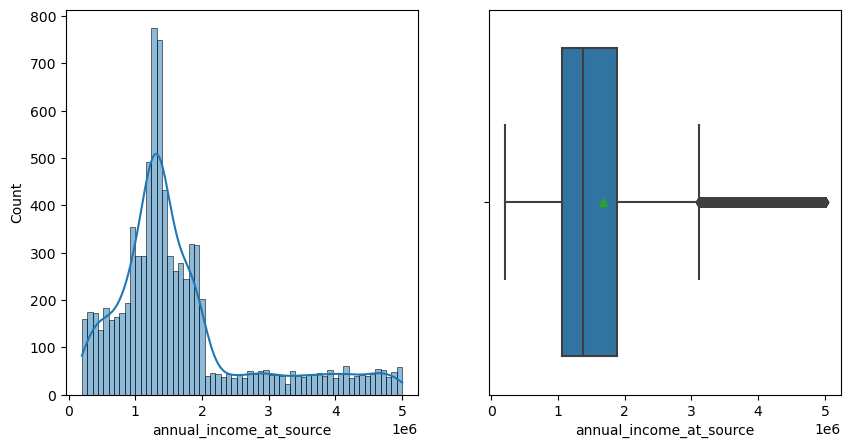

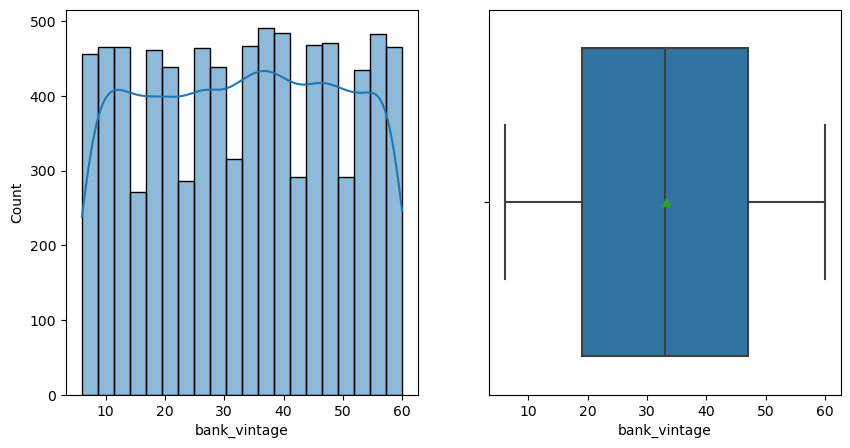

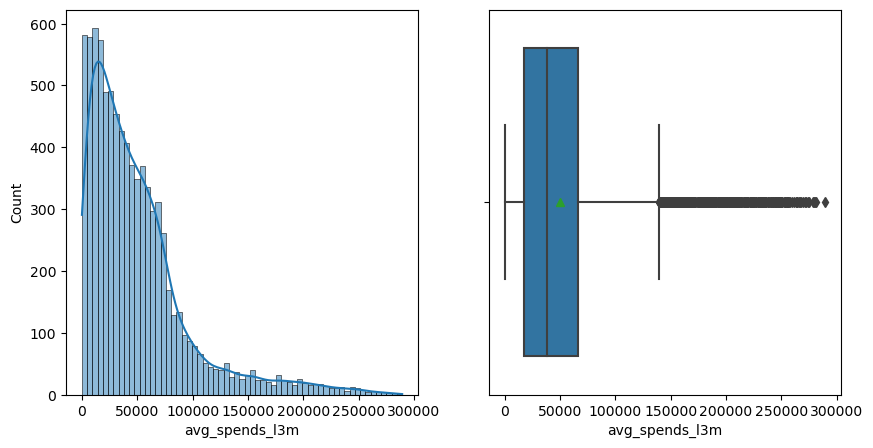

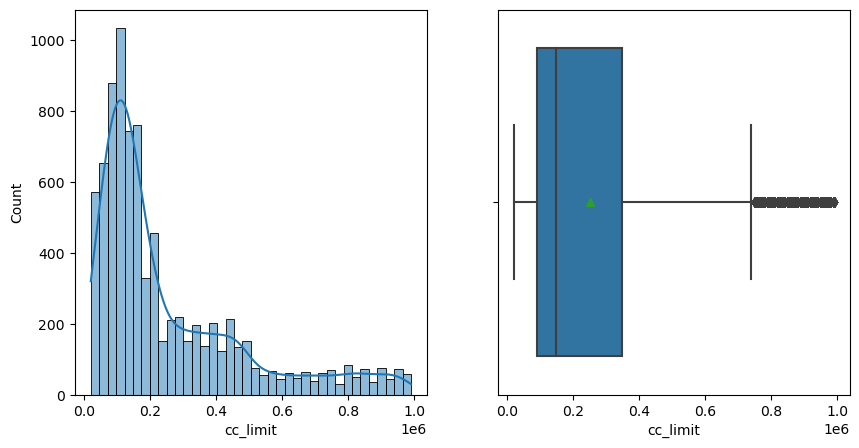

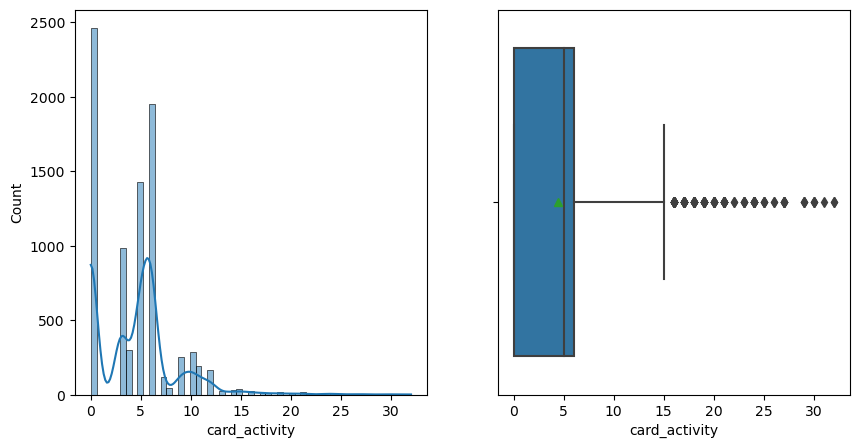

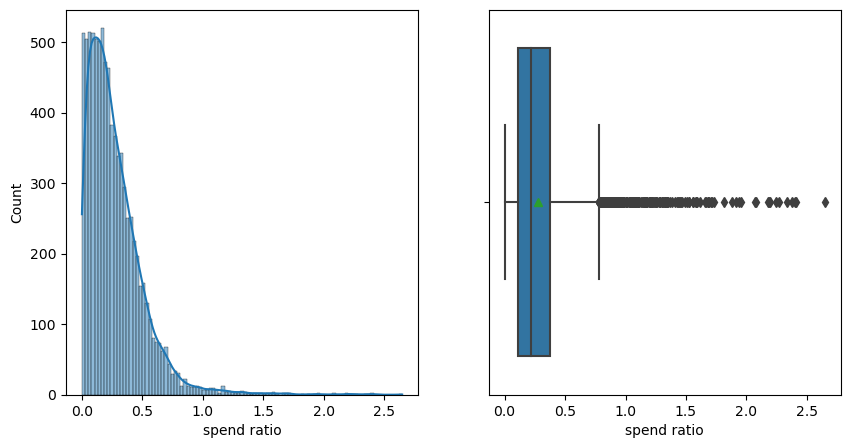

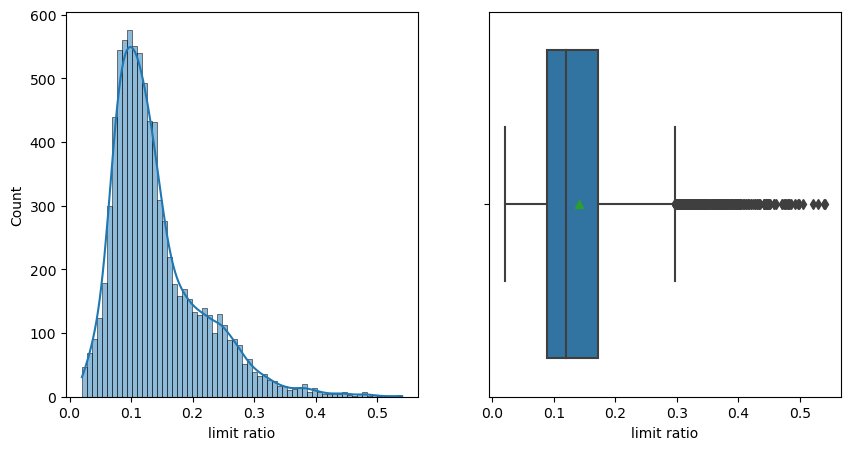

In [1026]:
for i in numr:
    fig_dims=(10,5)
    fig,axes=plt.subplots(ncols=2,figsize=fig_dims)
    sns.histplot(data=gd_df2,x=i, kde=True,ax=axes[0])
    sns.boxplot(x=gd_df2[i],showmeans=True,ax=axes[1])
    plt.show()

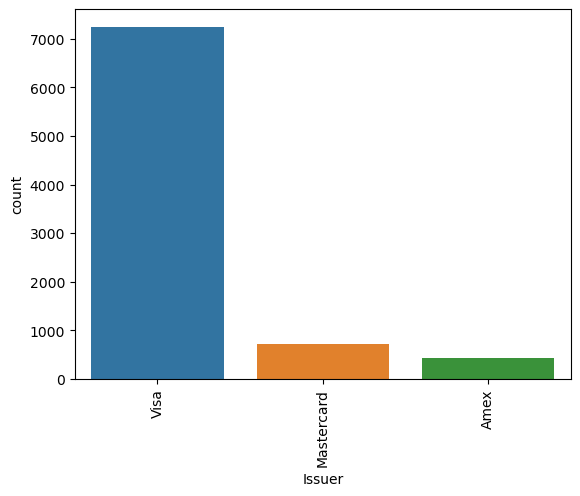

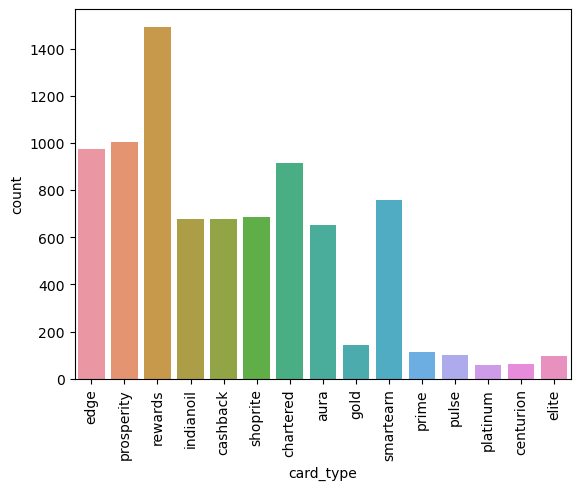

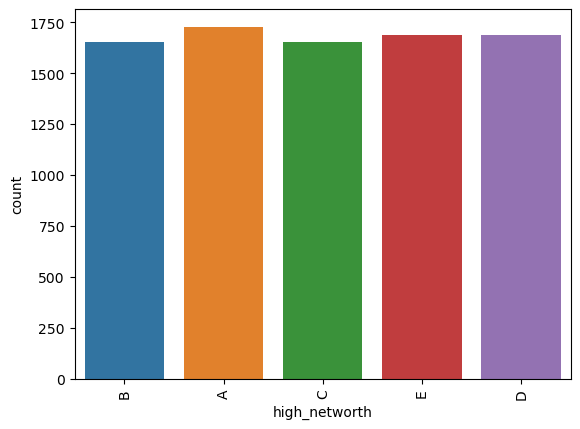

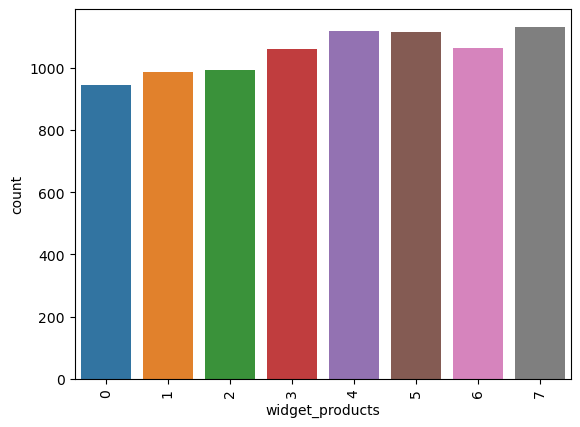

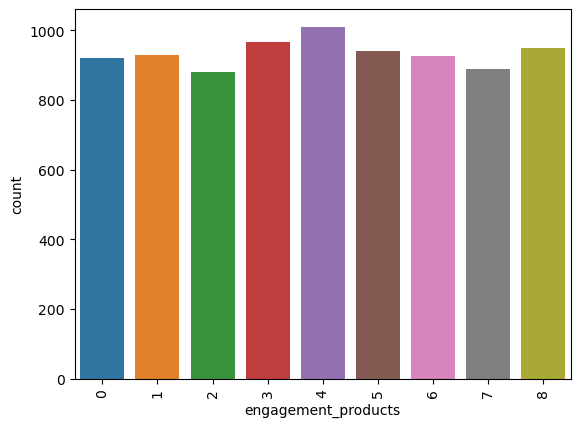

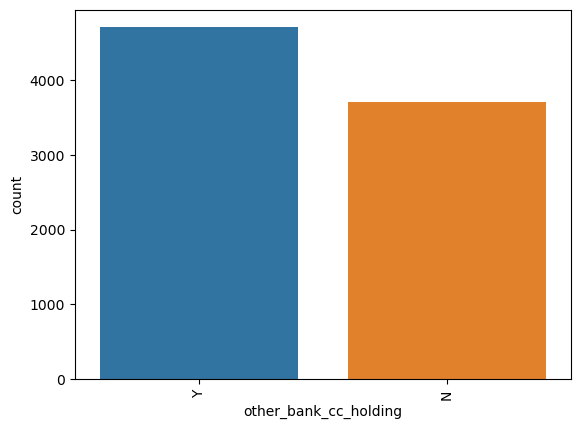

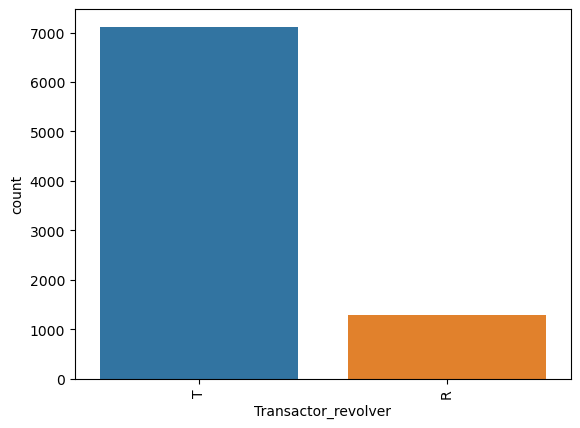

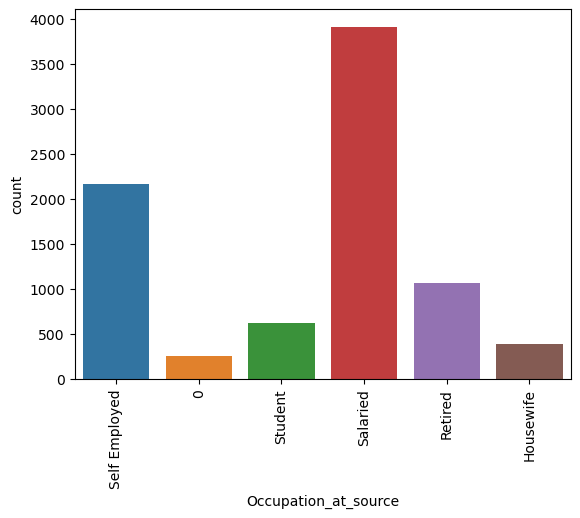

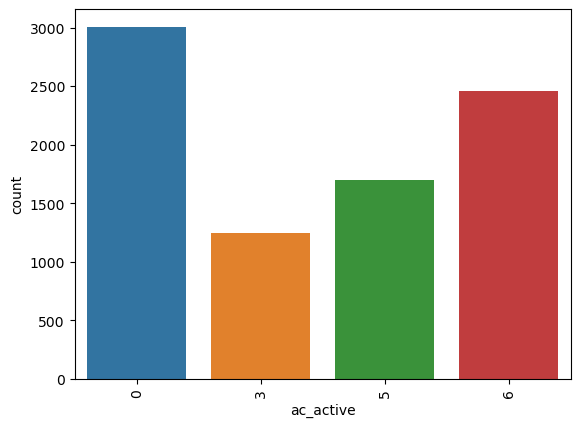

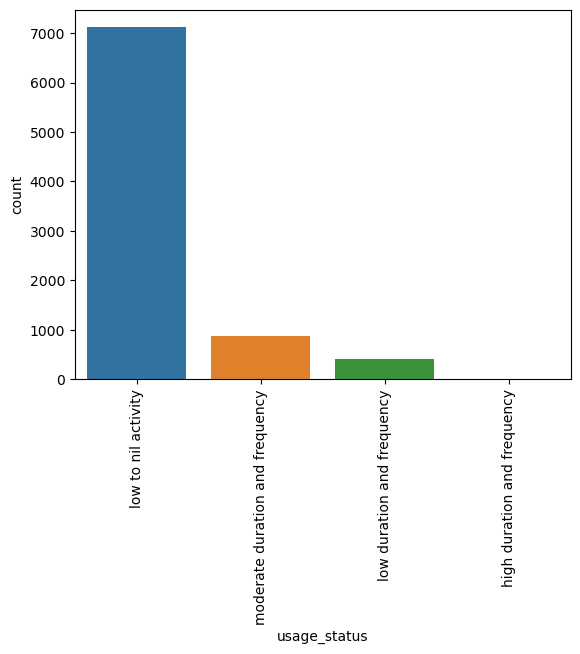

In [1027]:
for i in catg:
    plt.xticks(rotation=90)
    sns.countplot(x=gd_df2[i])
    plt.show()

Observations:
- T is significantly higher than R
- rewards is the most common and platinum is the least common
- More than half have cc of other banks
- Salaried most common
- Most have inactive account status
- Most have low to nil usage

In [1028]:
df_num=gd_df2[numr]

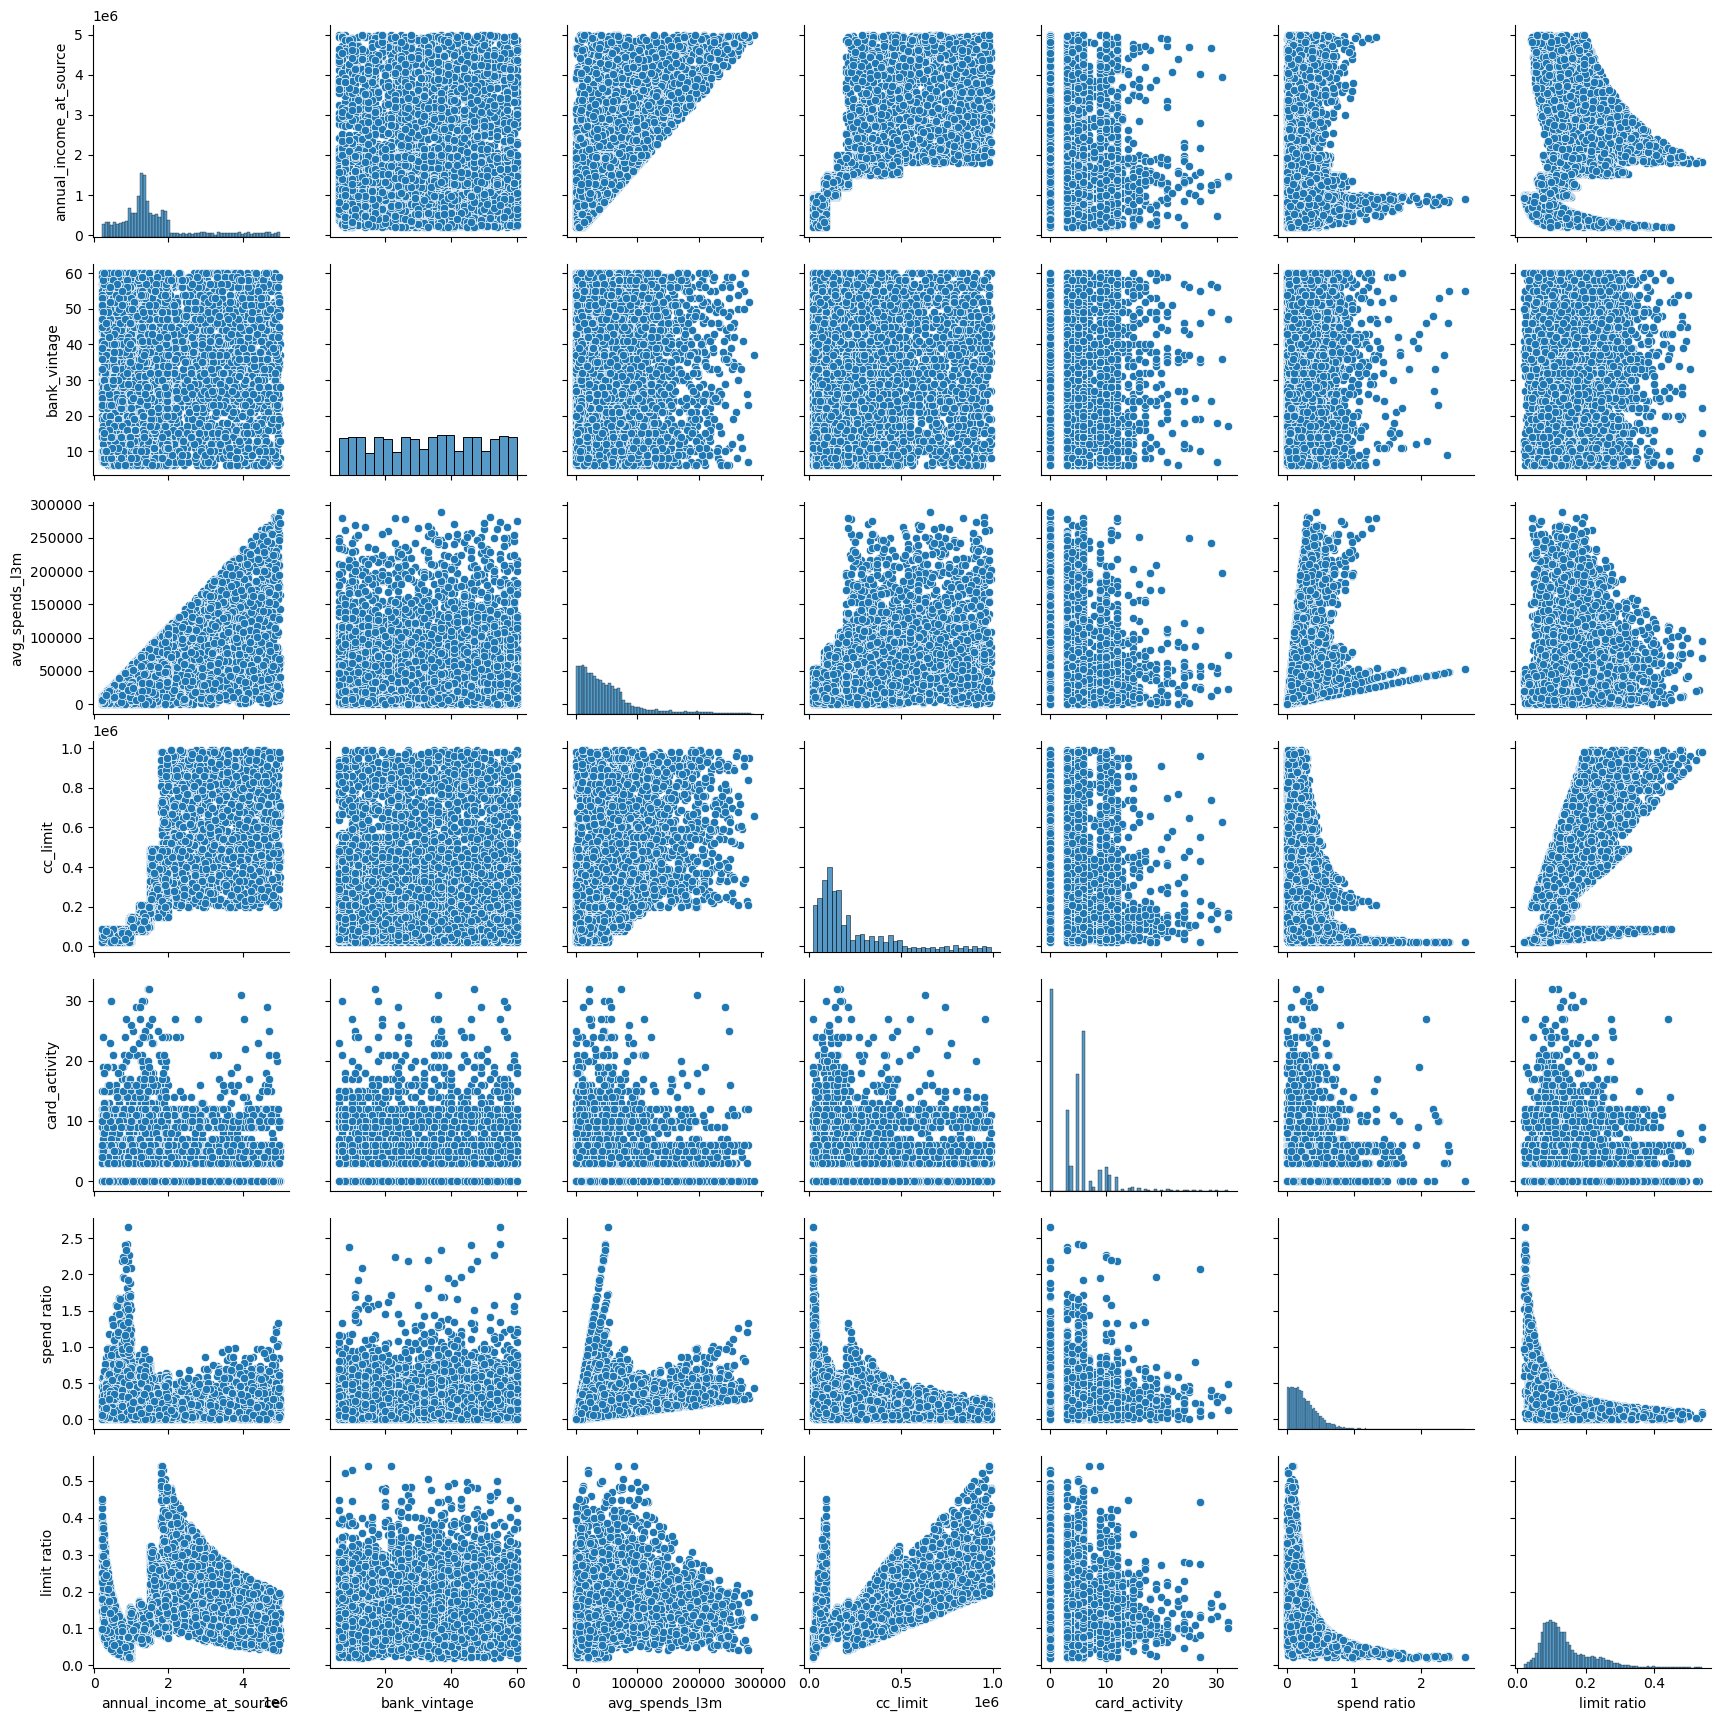

In [1029]:
sns.pairplot(df_num)

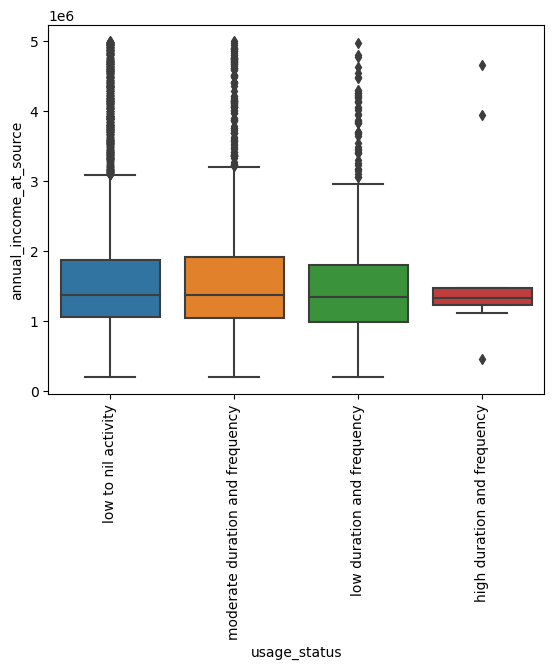

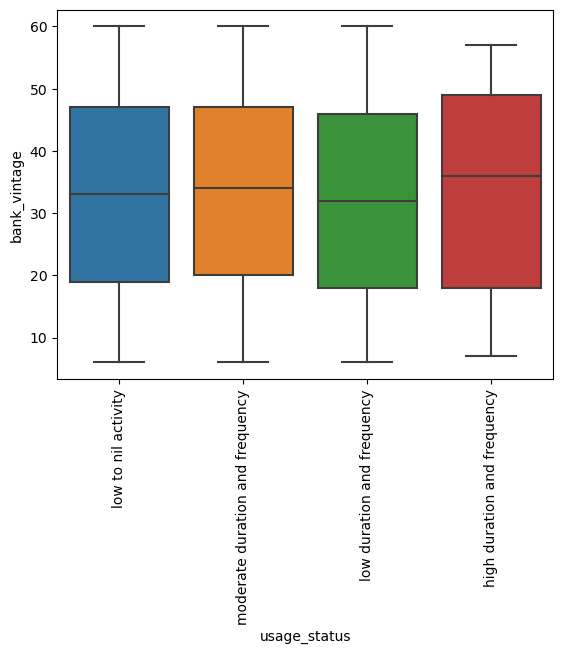

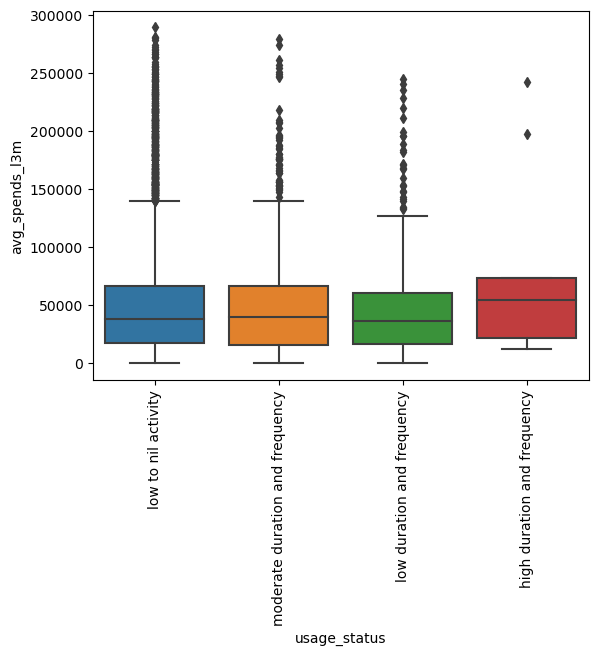

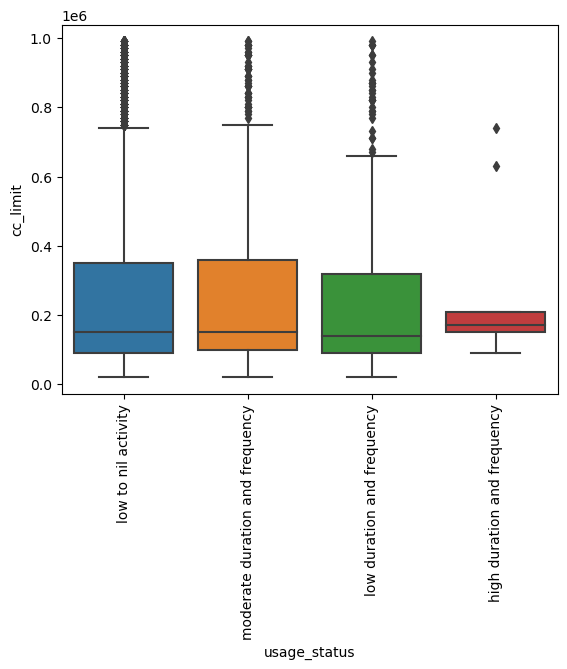

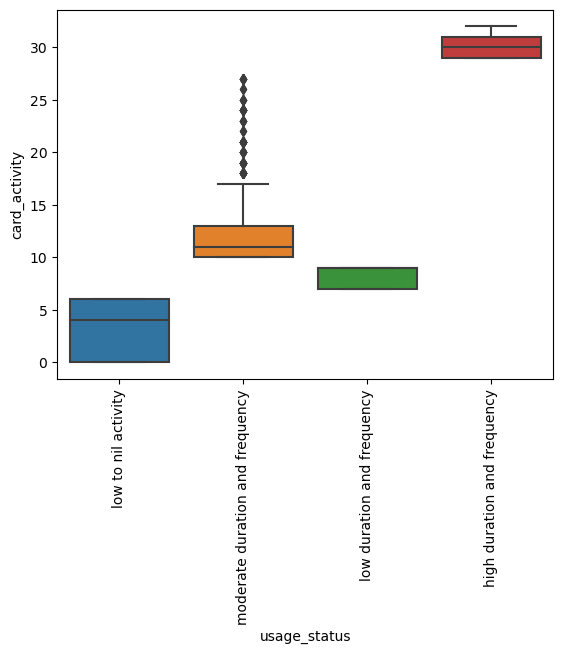

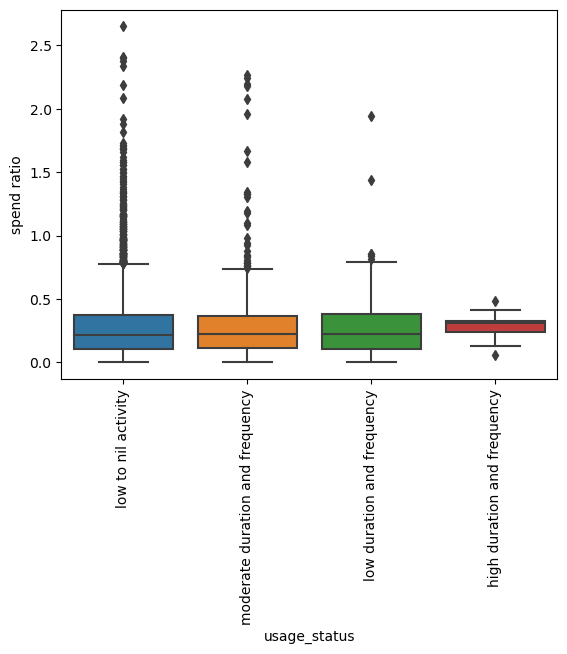

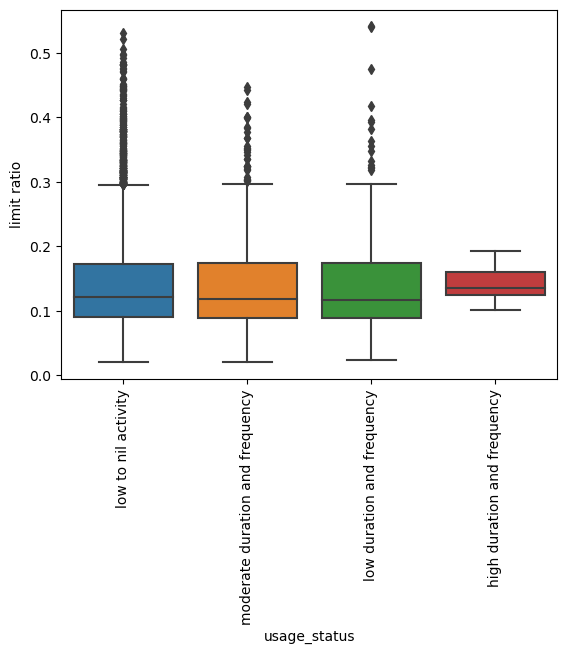

In [1030]:
for i in numr:
    plt.xticks(rotation=90)
    sns.boxplot(x=gd_df2['usage_status'],y=gd_df2[i])
    plt.show()

Observations:
- People with high usage have higer cc limits, avg spending and spend ratio as compared to the other categories. Hence, in order to encourage spending, limit might be an important parameter
- People with high usage have a higher median vintage as compared to the rest. Loyalty to the bank? Do they have otehr bank cc?
- Income doesn't seem to be a factor

Nothing noteworthy

<AxesSubplot:xlabel='usage_status', ylabel='limit ratio'>

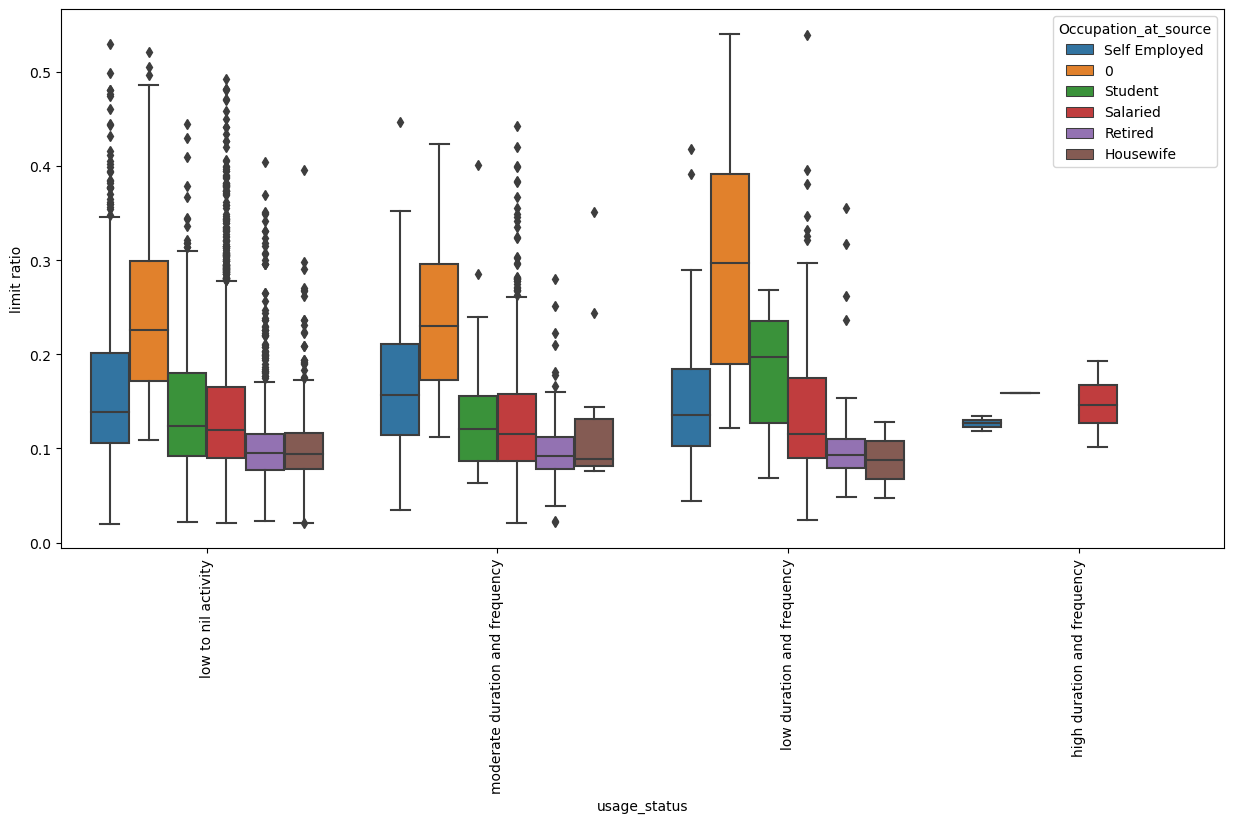

In [1031]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
sns.boxplot(y=gd_df2['limit ratio'],x=gd_df2['usage_status'],hue=gd_df2['Occupation_at_source'])

Observations:-
- 'Other' category of occupation seems to have higher limit than the rest
- Only salaried customers show high usage
- Some student category customers, despite having high limits, show very little usage

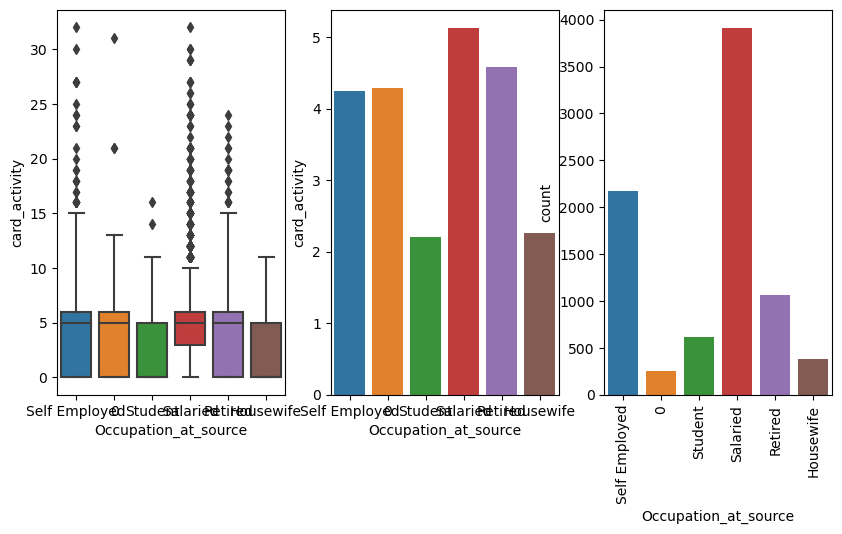

In [1032]:
fig_dims=(10,5)
fig,axes=plt.subplots(ncols=3,figsize=fig_dims)
plt.xticks(rotation=90)
sns.boxplot(x=gd_df2['Occupation_at_source'],y=gd_df2['card_activity'],ax=axes[0])
sns.barplot(x=gd_df2['Occupation_at_source'],y=gd_df2['card_activity'],ci=False,ax=axes[1])
sns.countplot(x=gd_df2['Occupation_at_source'],ax=axes[2])
plt.show()

Observations:
- Students and housewifes are the least active


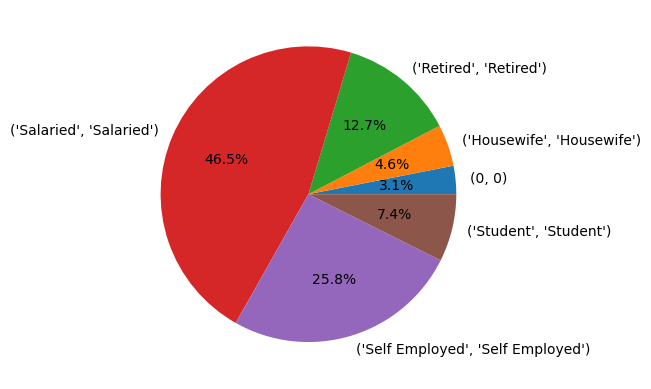

In [1033]:
plt.pie(x=gd_df2.groupby('Occupation_at_source')['Occupation_at_source'].value_counts(),autopct='%.1f%%',labels=gd_df2.groupby('Occupation_at_source')['Occupation_at_source'].value_counts().index);

Observations:
- 0 CATEGORY HAS HIGHER USAGE
- Student and housewife usage needs to be improved

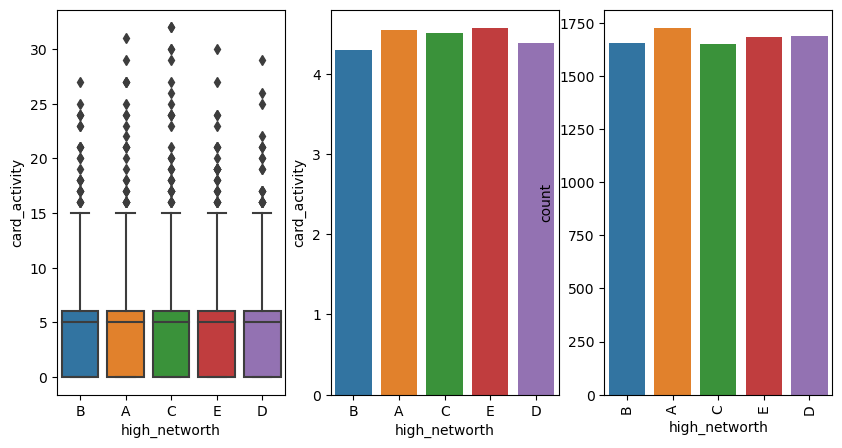

In [1034]:
fig_dims=(10,5)
fig,axes=plt.subplots(ncols=3,figsize=fig_dims)
plt.xticks(rotation=90)
sns.boxplot(x=gd_df2['high_networth'],y=gd_df2['card_activity'],ax=axes[0])
sns.barplot(x=gd_df2['high_networth'],y=gd_df2['card_activity'],ci=False,ax=axes[1])
sns.countplot(x=gd_df2['high_networth'],ax=axes[2])
plt.show()

<AxesSubplot:xlabel='usage_status', ylabel='limit ratio'>

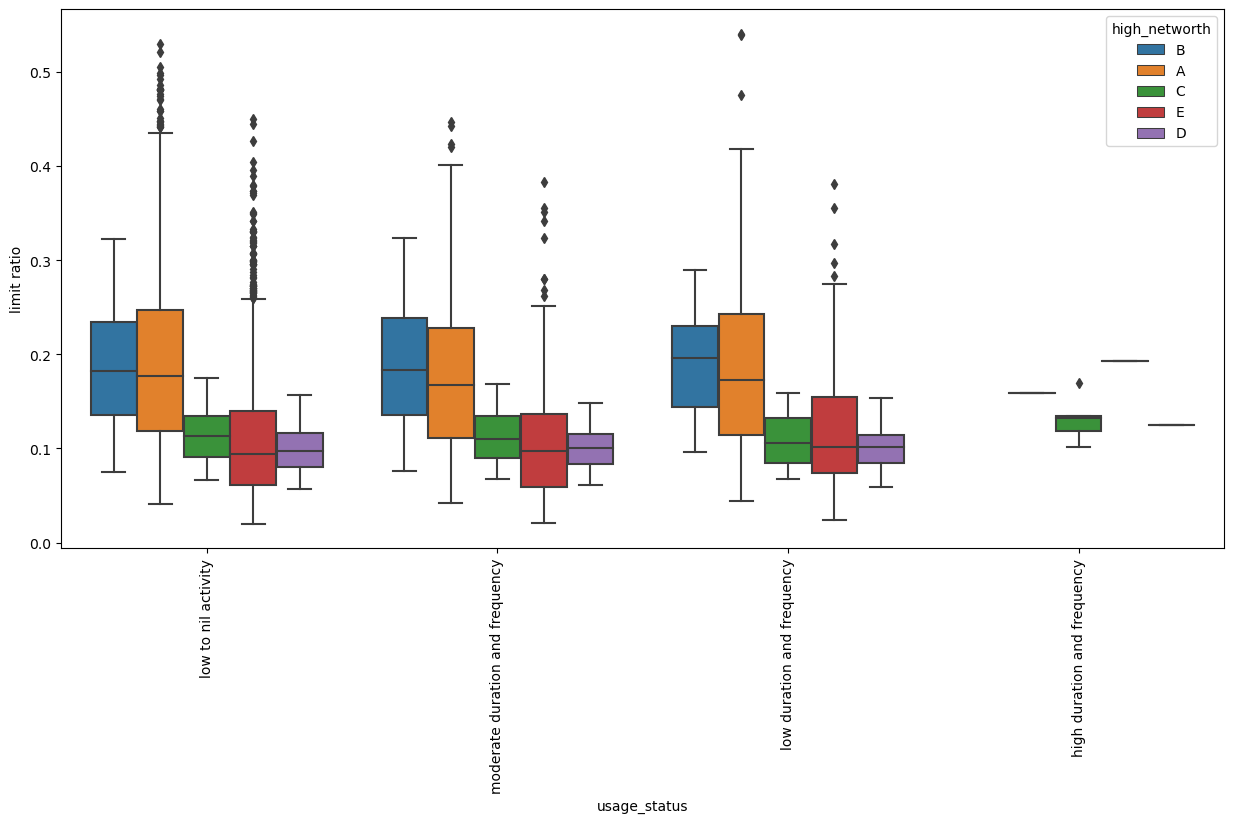

In [1035]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
sns.boxplot(y=gd_df2['limit ratio'],x=gd_df2['usage_status'],hue=gd_df2['high_networth'])

<AxesSubplot:xlabel='usage_status', ylabel='spend ratio'>

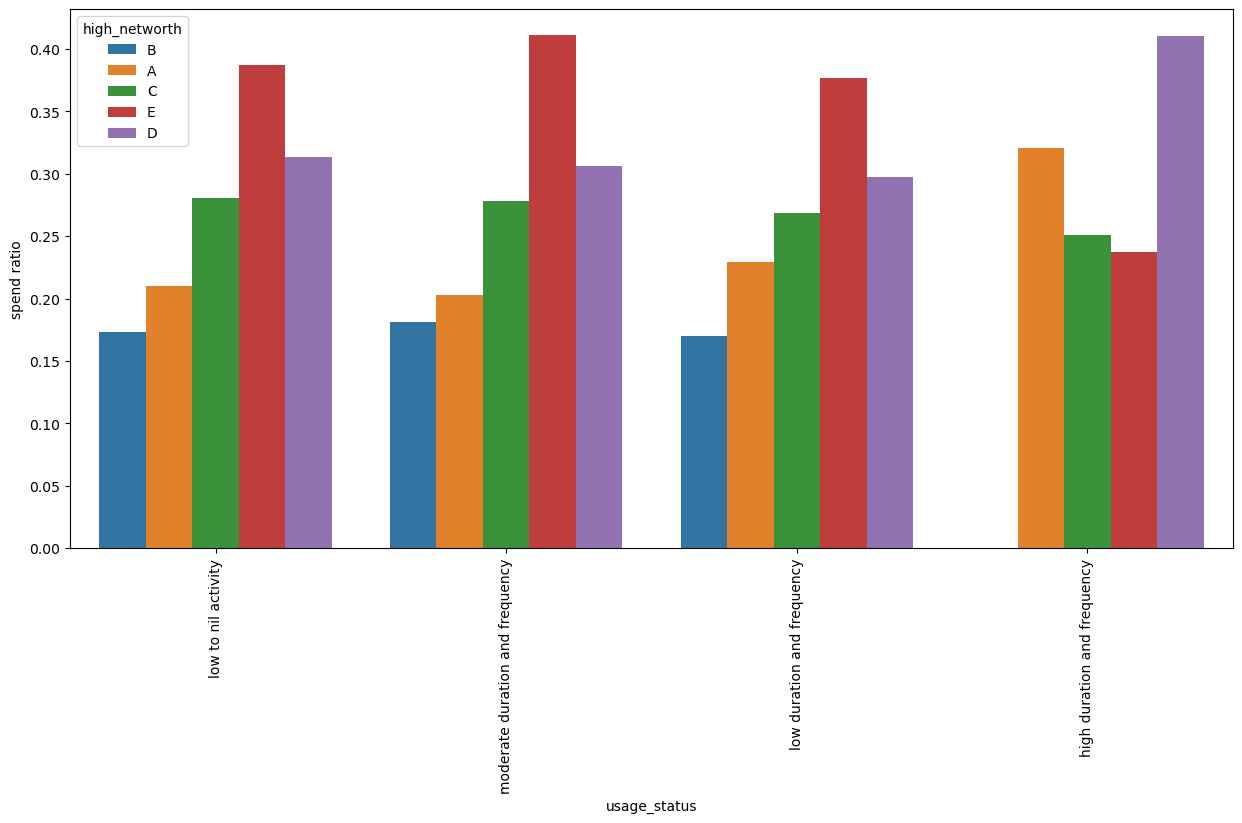

In [1036]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
sns.barplot(y=gd_df2['spend ratio'],x=gd_df2['usage_status'],hue=gd_df2['high_networth'],ci=False)

Observations:
- C category generally spends

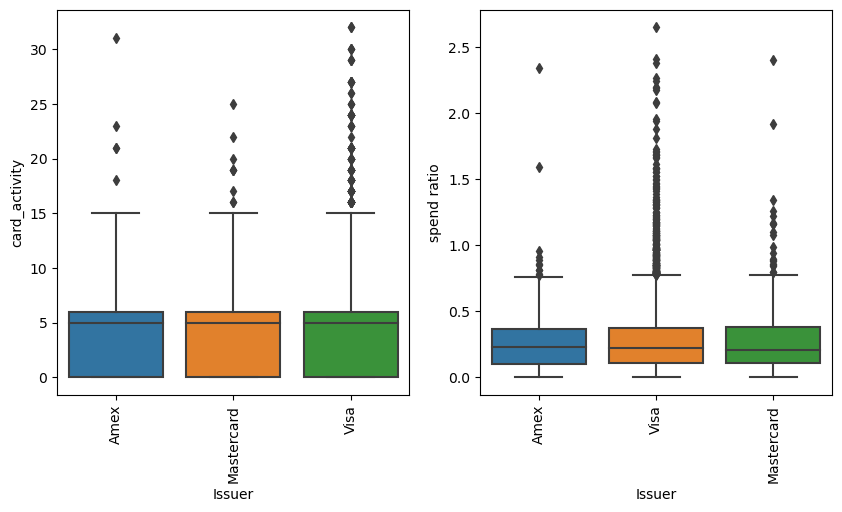

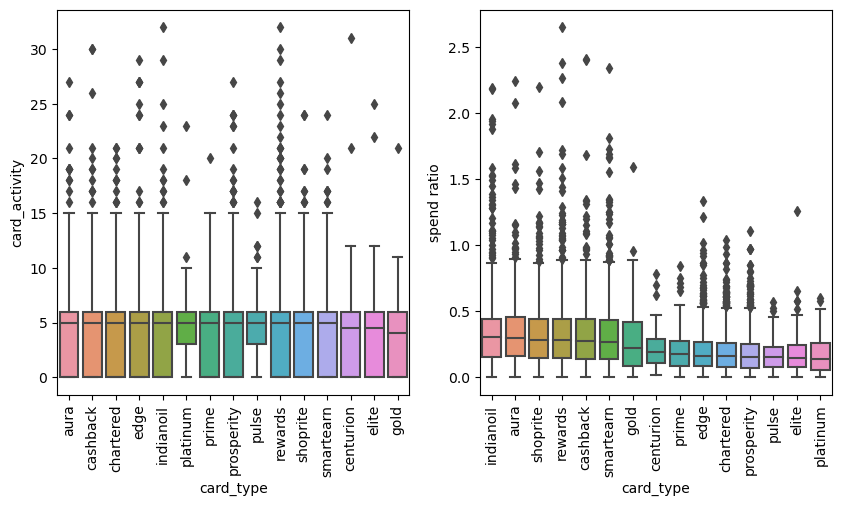

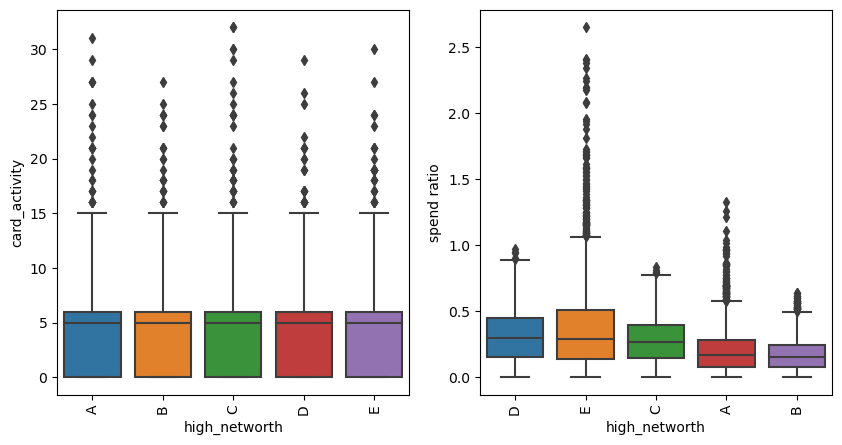

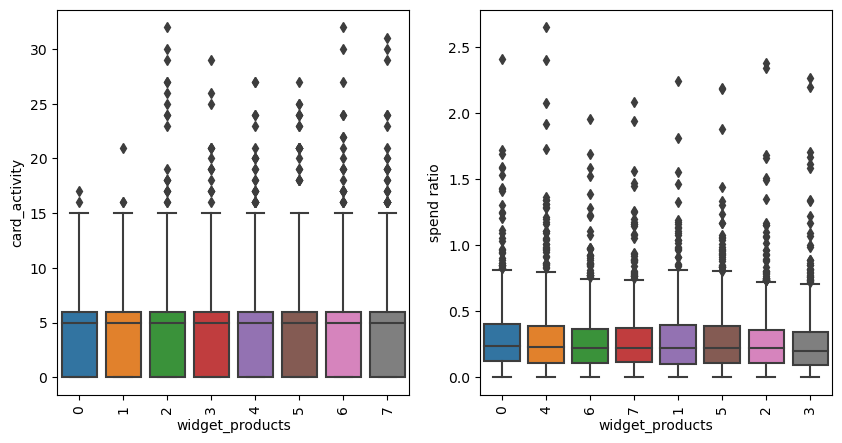

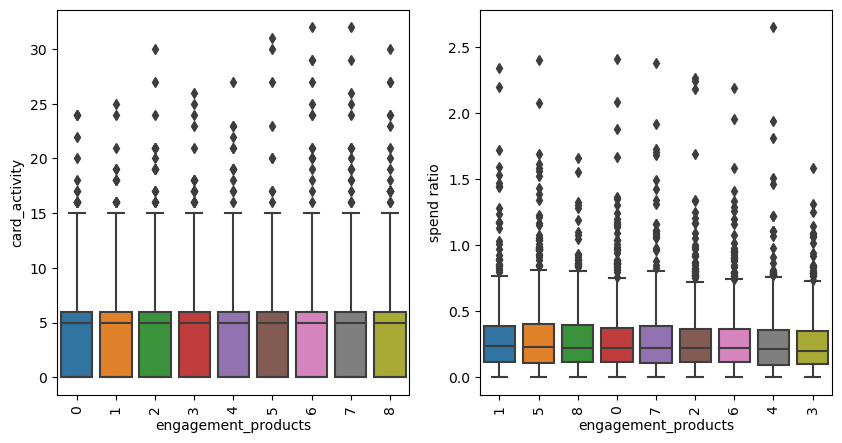

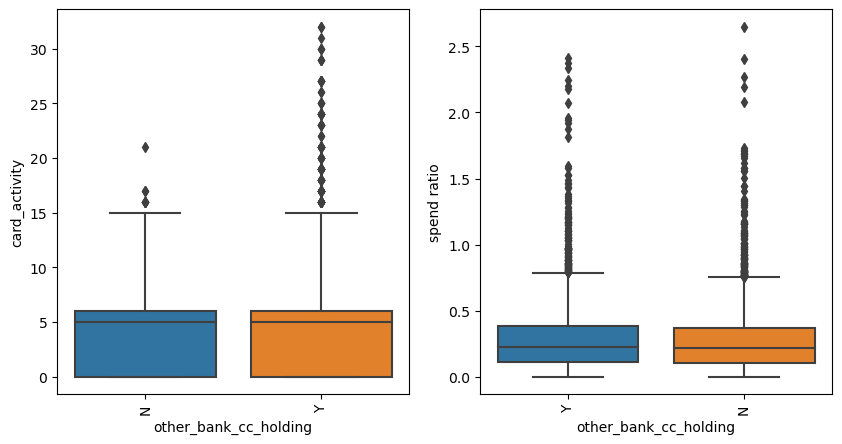

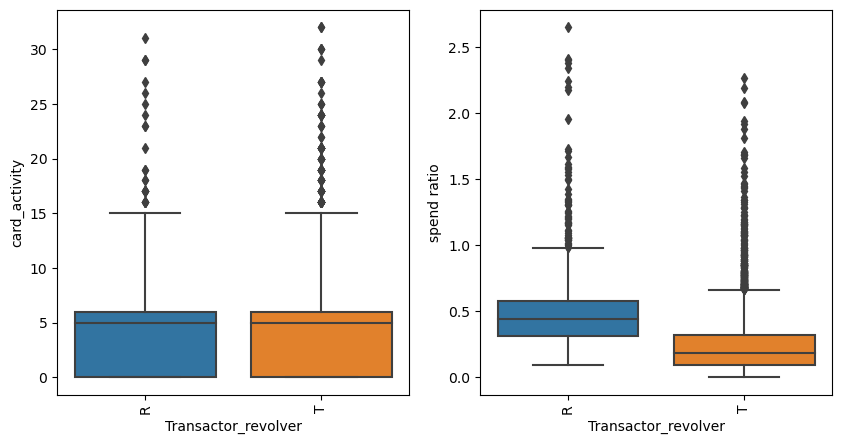

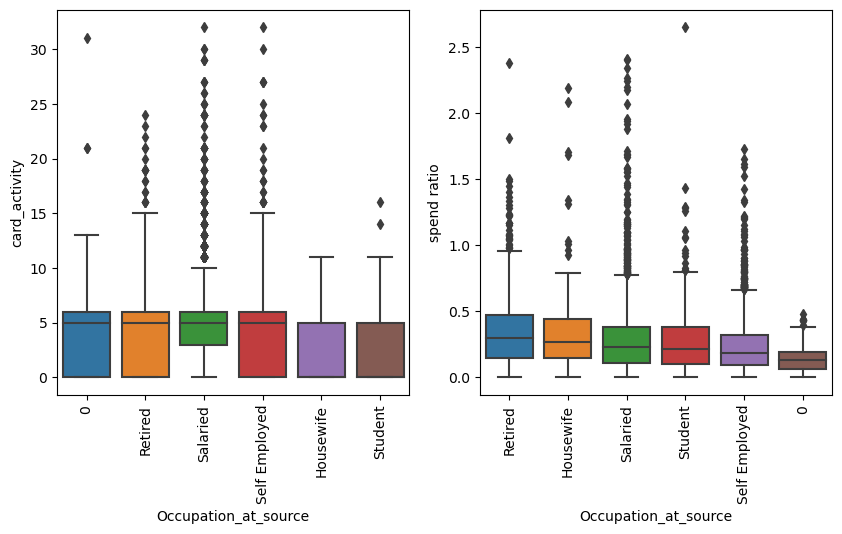

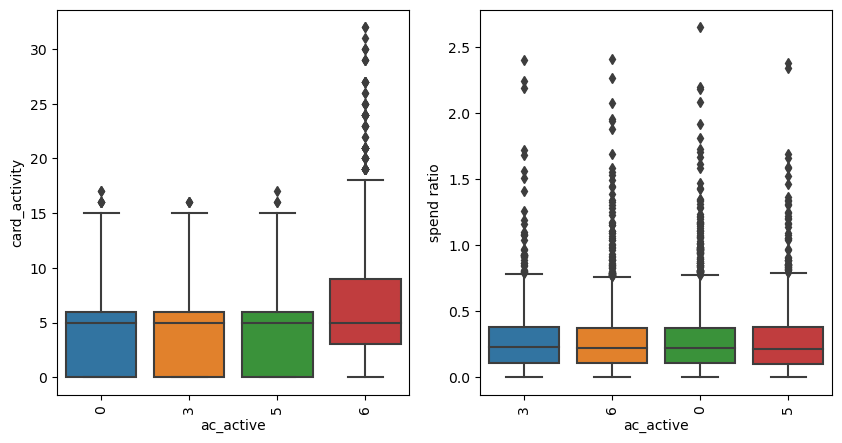

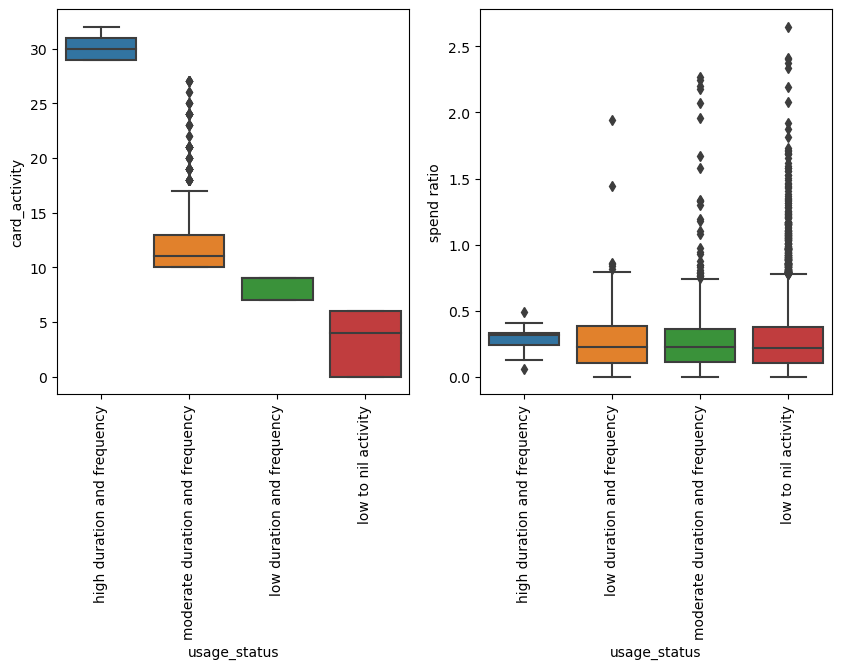

In [1037]:
for i in catg:
    fig_dims=(10,5)
    fig,axes=plt.subplots(ncols=2,figsize=fig_dims)
    ordr1=gd_df2.groupby(i)['card_activity'].median().sort_values(ascending=False).index
    ordr2=gd_df2.groupby(i)['spend ratio'].median().sort_values(ascending=False).index
    sns.boxplot(x=gd_df2[i],y=gd_df2['card_activity'],order=ordr1,ax=axes[0])
    sns.boxplot(x=gd_df2[i],y=gd_df2['spend ratio'],order=ordr2,ax=axes[1])
    plt.sca(axes[0])
    plt.xticks(rotation=90)
    plt.sca(axes[1])
    plt.xticks(rotation=90)
    plt.show()

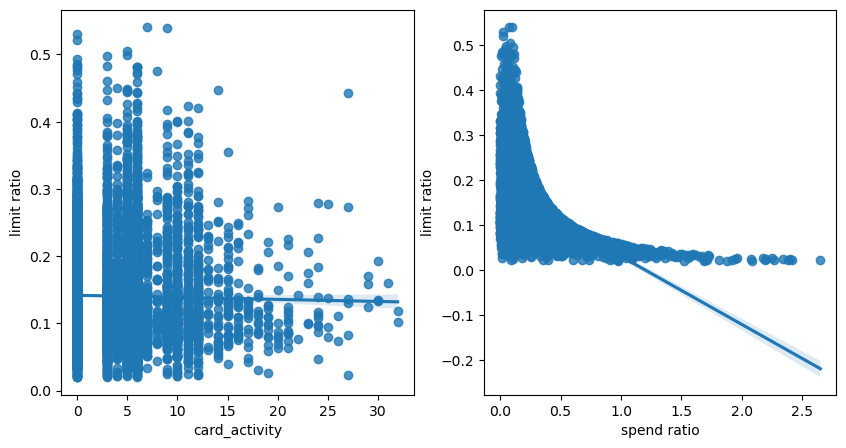

In [1038]:
#limit vs usage
fig_dims=(10,5)
fig,axes=plt.subplots(ncols=2,figsize=fig_dims)
sns.regplot(x=gd_df2['card_activity'],y=gd_df2['limit ratio'],ax=axes[0])
sns.regplot(x=gd_df2['spend ratio'],y=gd_df2['limit ratio'],ax=axes[1])
plt.show()

<AxesSubplot:xlabel='card_activity', ylabel='limit ratio'>

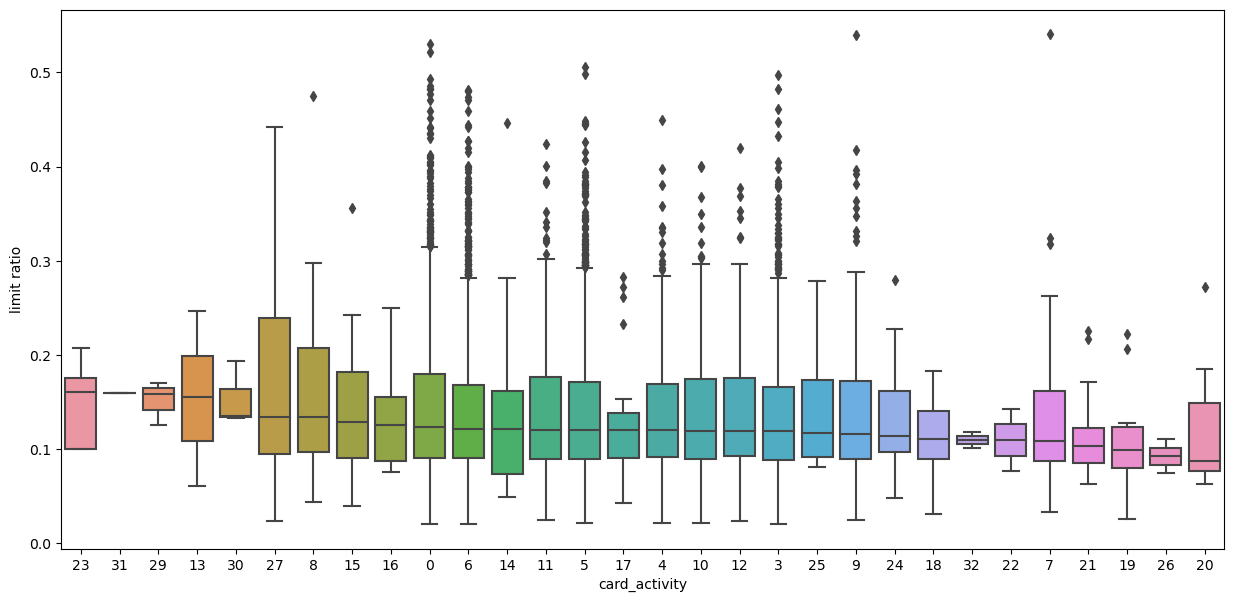

In [1039]:
plt.figure(figsize=(15,7))
ordr3=gd_df2.groupby('card_activity')['limit ratio'].median().sort_values(ascending=False).index
sns.boxplot(x=gd_df2['card_activity'],y=gd_df2['limit ratio'],order=ordr3)

<AxesSubplot:xlabel='usage_status', ylabel='limit ratio'>

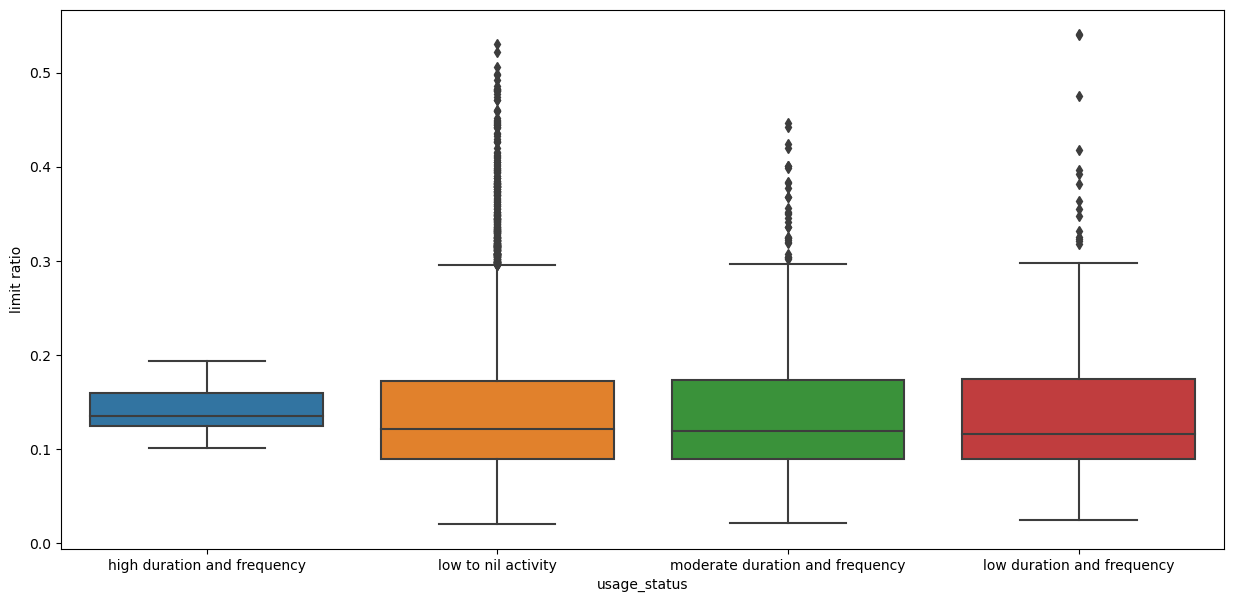

In [1040]:
plt.figure(figsize=(15,7))
ordr4=gd_df2.groupby('usage_status')['limit ratio'].median().sort_values(ascending=False).index
sns.boxplot(x=gd_df2['usage_status'],y=gd_df2['limit ratio'],order=ordr4)

<AxesSubplot:xlabel='card_activity', ylabel='annual_income_at_source'>

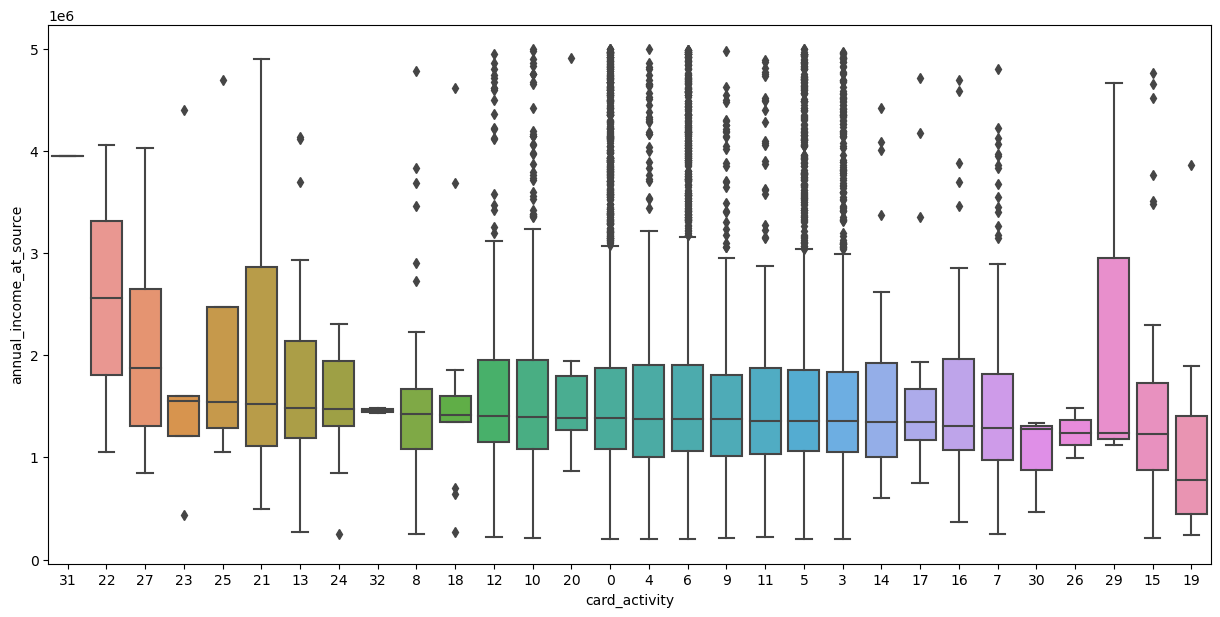

In [815]:
#income vs usage
plt.figure(figsize=(15,7))
ordr3=gd_df2.groupby('card_activity')['annual_income_at_source'].median().sort_values(ascending=False).index
sns.boxplot(x=gd_df2['card_activity'],y=gd_df2['annual_income_at_source'],order=ordr3)

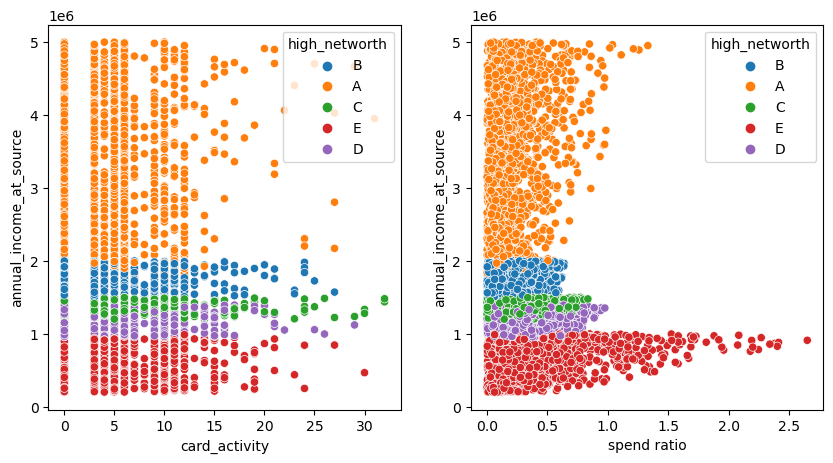

In [812]:
fig_dims=(10,5)
fig,axes=plt.subplots(ncols=2,figsize=fig_dims)
sns.scatterplot(x=gd_df2['card_activity'],y=gd_df2['annual_income_at_source'],hue=gd_df2['high_networth'],ax=axes[0])
sns.scatterplot(x=gd_df2['spend ratio'],y=gd_df2['annual_income_at_source'],hue=gd_df2['high_networth'],ax=axes[1])
plt.show()

<AxesSubplot:xlabel='usage_status', ylabel='annual_income_at_source'>

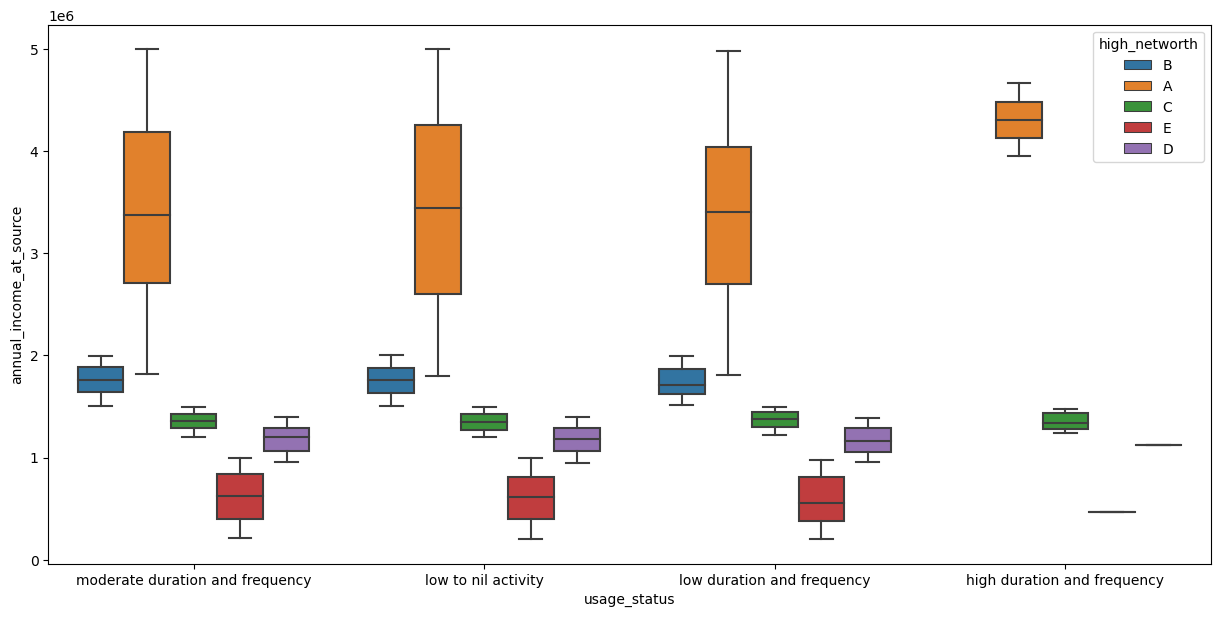

In [810]:
plt.figure(figsize=(15,7))
ordr4=gd_df2.groupby('usage_status')['annual_income_at_source'].median().sort_values(ascending=False).index
sns.boxplot(x=gd_df2['usage_status'],y=gd_df2['annual_income_at_source'],hue=gd_df2['high_networth'],order=ordr4)

<AxesSubplot:>

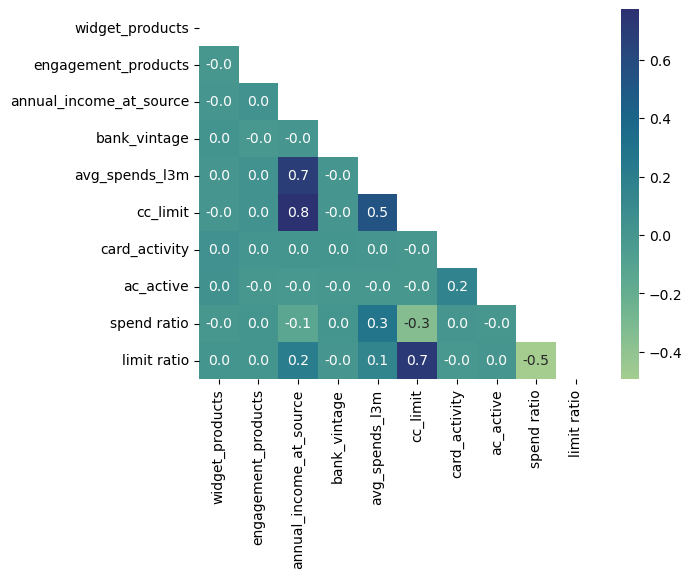

In [1041]:
cor=gd_df2.corr()
mask=np.triu(np.ones_like(cor,dtype='bool'))
sns.heatmap(cor,annot=True,fmt='.1f',cmap='crest',mask=mask)

<AxesSubplot:xlabel='cc_limit', ylabel='spend ratio'>

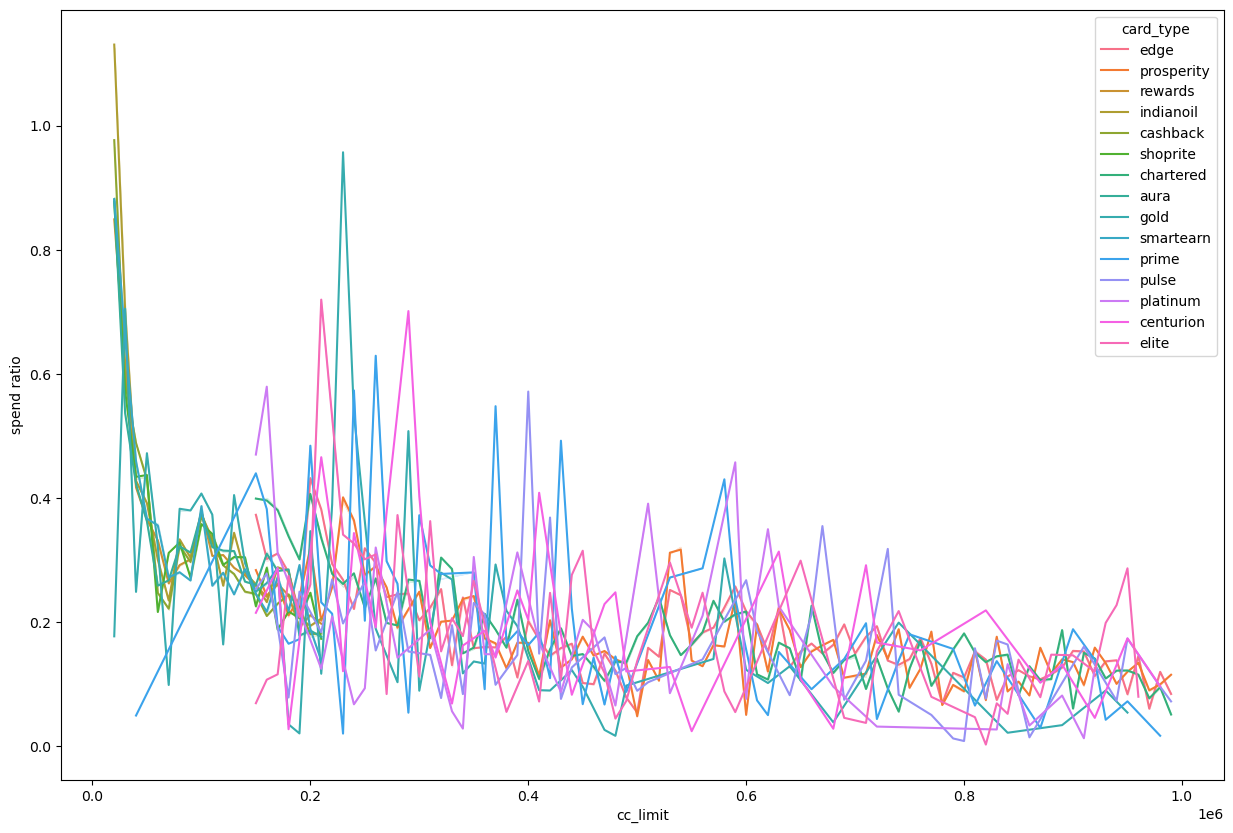

In [821]:
plt.figure(figsize=(15,10))
sns.lineplot(x=gd_df2['cc_limit'],y=gd_df2['spend ratio'],hue=gd_df2['card_type'],ci=False)

<AxesSubplot:xlabel='cc_limit', ylabel='card_activity'>

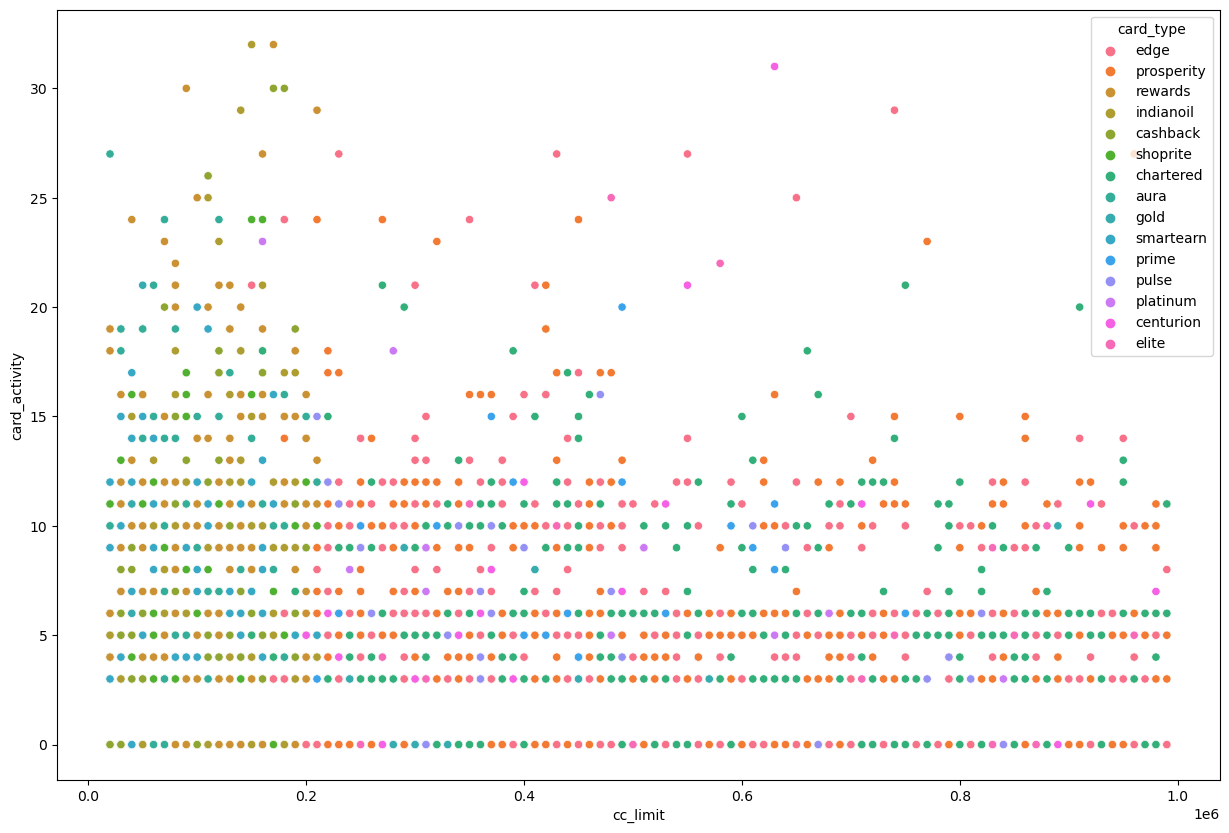

In [825]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=gd_df2['cc_limit'],y=gd_df2['card_activity'],hue=gd_df2['card_type'],ci=False)

<AxesSubplot:xlabel='card_activity', ylabel='card_type'>

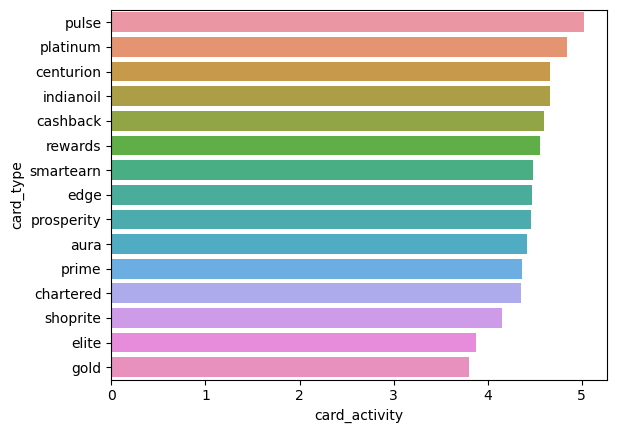

In [1050]:
sns.barplot(y=gd_df2['card_type'],x=gd_df2['card_activity'],ci=False,order=gd_df2.groupby('card_type')['card_activity'].mean().sort_values(ascending=False).index)

<AxesSubplot:xlabel='limit ratio', ylabel='card_type'>

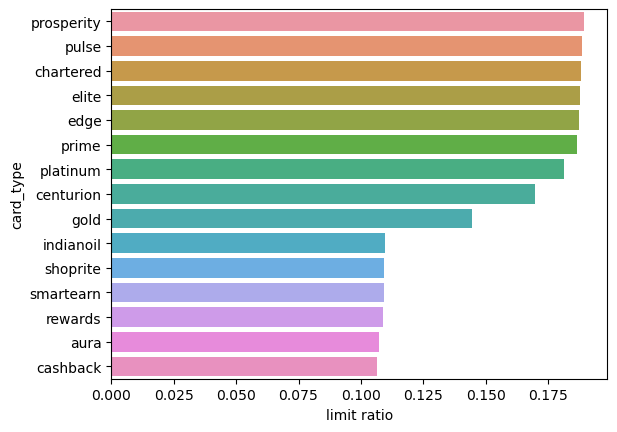

In [1044]:
sns.barplot(x=gd_df2['limit ratio'],y=gd_df2['card_type'],ci=False,order=gd_df2.groupby('card_type')['limit ratio'].mean().sort_values(ascending=False).index)

<AxesSubplot:xlabel='spend ratio', ylabel='card_type'>

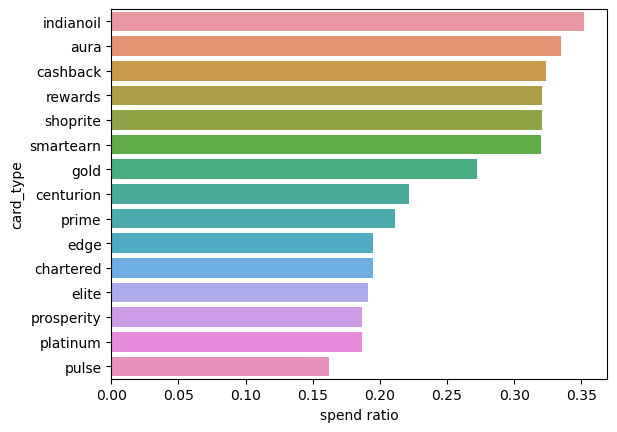

In [1049]:
sns.barplot(y=gd_df2['card_type'],x=gd_df2['spend ratio'],ci=False,order=gd_df2.groupby('card_type')['spend ratio'].mean().sort_values(ascending=False).index)

In [ ]:
ct

<AxesSubplot:xlabel='spend ratio', ylabel='cc_limit'>

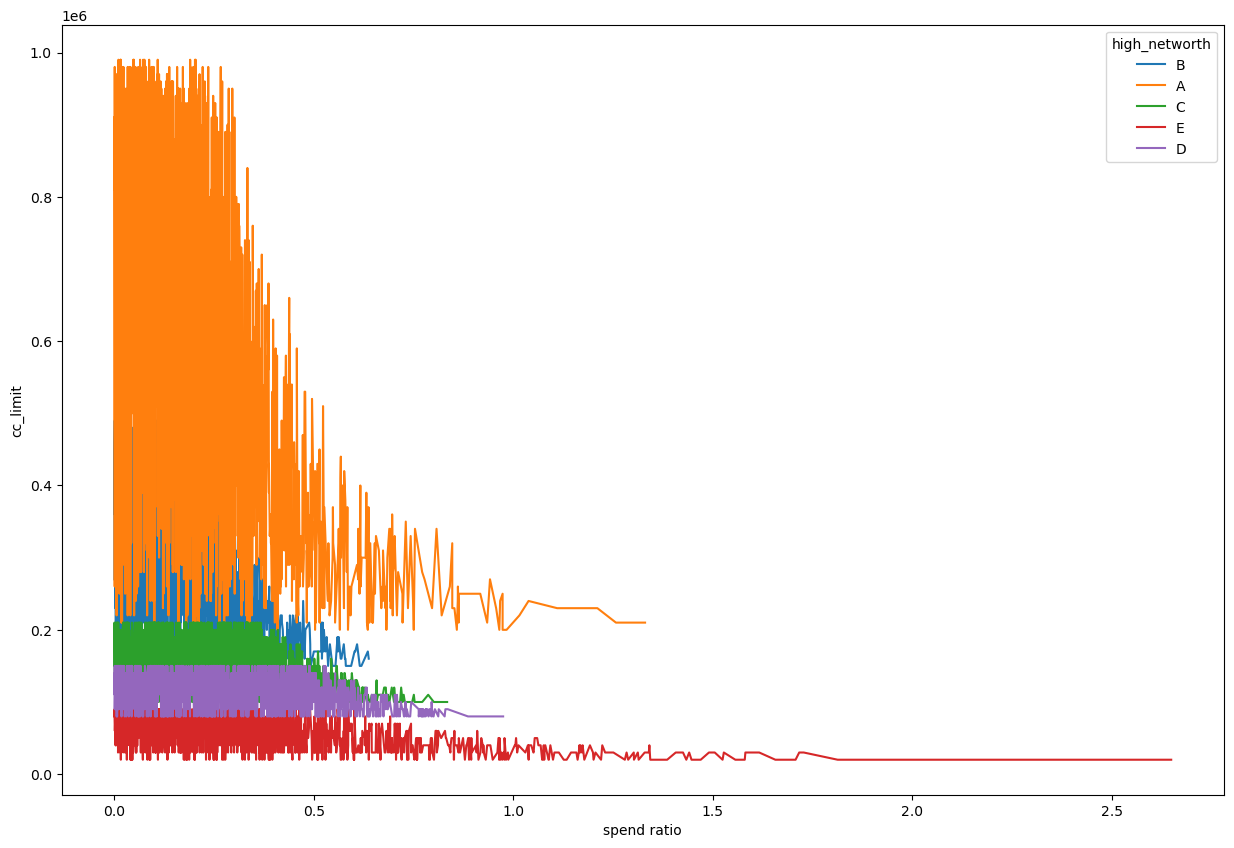

In [823]:
plt.figure(figsize=(15,10))
sns.lineplot(y=gd_df2['cc_limit'],x=gd_df2['spend ratio'],hue=gd_df2['high_networth'],ci=False)

Observations: 
- There is a clearrelation between the annual income, and the networth, and cc limit
- Within thehe networth, E has the highest range of spend ratio, followed by A

In [844]:
gd_df2['limit ratio']=gd_df2['cc_limit']/gd_df2['annual_income_at_source']

<AxesSubplot:xlabel='limit ratio', ylabel='Count'>

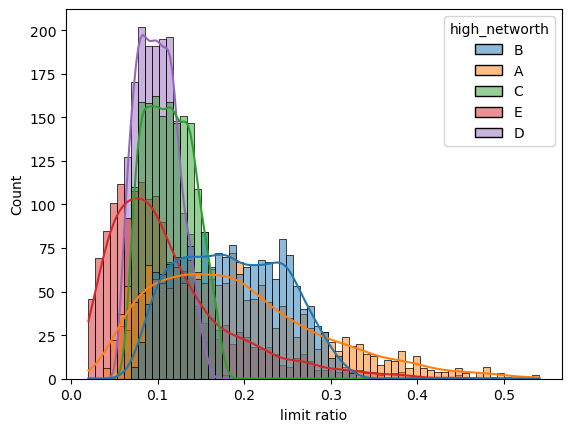

In [852]:
sns.histplot(x= gd_df2['limit ratio'],hue=gd_df2['high_networth'],kde=True)

<AxesSubplot:xlabel='annual_income_at_source', ylabel='cc_limit'>

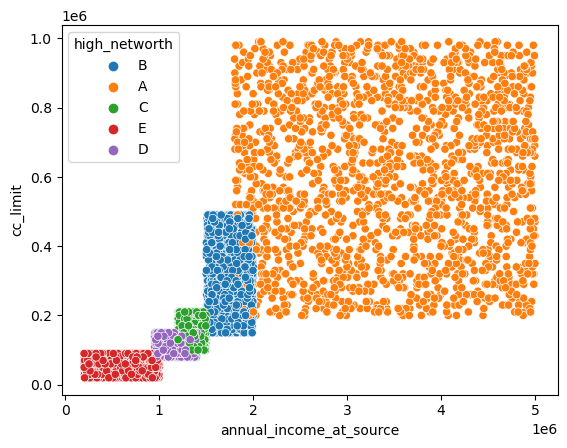

In [856]:
sns.scatterplot(x=gd_df2['annual_income_at_source'],y=gd_df2['cc_limit'],hue=gd_df2['high_networth'])

<AxesSubplot:xlabel='high_networth', ylabel='limit ratio'>

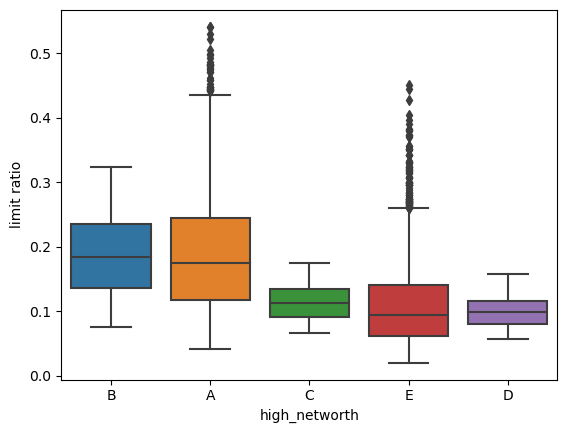

In [857]:
sns.boxplot(x=gd_df2['high_networth'],y=gd_df2['limit ratio'])

<AxesSubplot:xlabel='spend ratio', ylabel='limit ratio'>

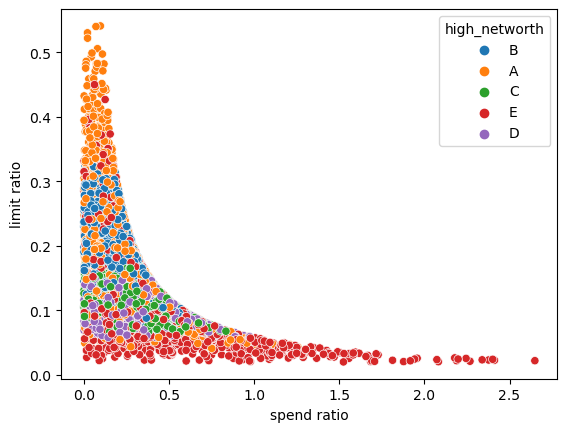

In [862]:
sns.scatterplot(data=gd_df2,x=gd_df2['spend ratio'],y=gd_df2['limit ratio'],hue=gd_df2['high_networth'])

<AxesSubplot:xlabel='card_type', ylabel='limit ratio'>

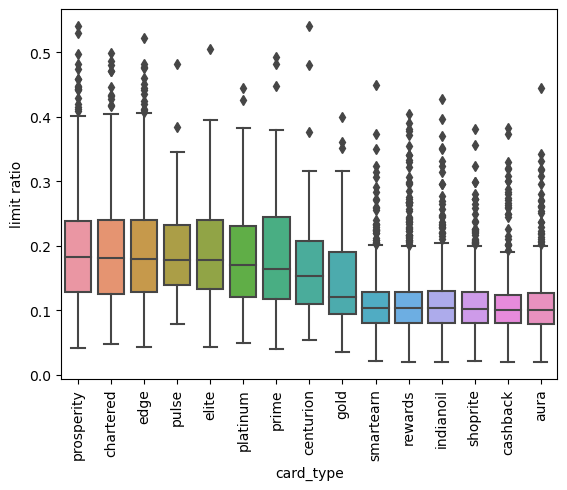

In [864]:
plt.xticks(rotation=90)
sns.boxplot(x=gd_df2['card_type'],y=gd_df2['limit ratio'],order=gd_df2.groupby('card_type')['limit ratio'].median().sort_values(ascending=False).index)

<AxesSubplot:xlabel='Transactor_revolver', ylabel='limit ratio'>

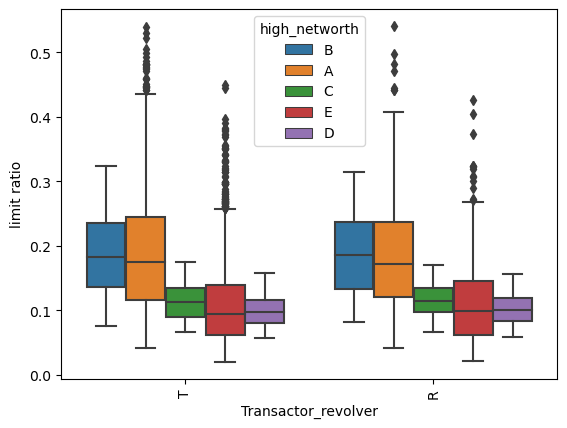

In [870]:
plt.xticks(rotation=90)
sns.boxplot(x=gd_df2['Transactor_revolver'],y=gd_df2['limit ratio'],hue=gd_df2['high_networth'])

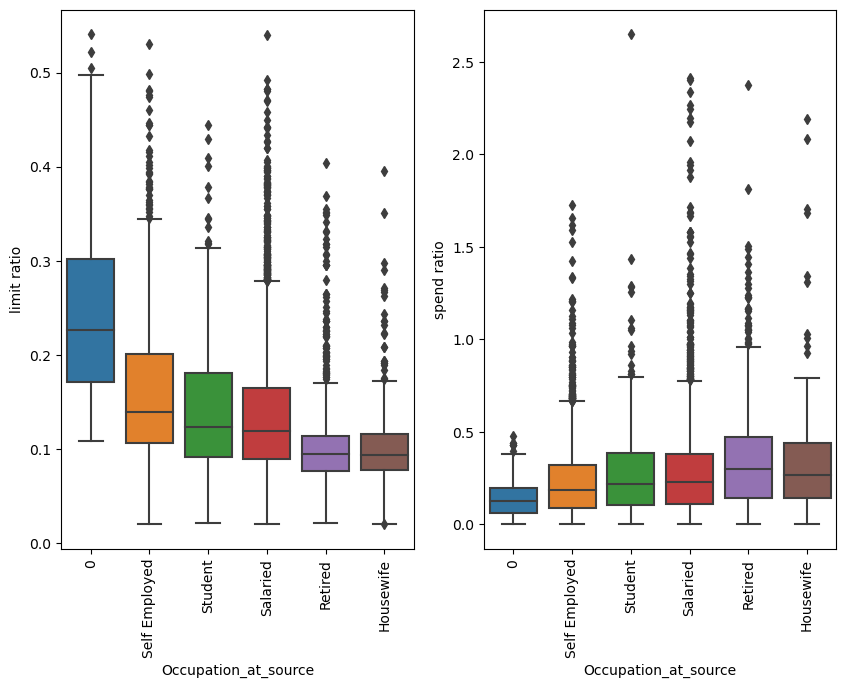

In [888]:
fig_dims=(10,7)
fig,axes=plt.subplots(ncols=2,figsize=fig_dims)
plt.sca(axes[0])
plt.xticks(rotation=90)
sns.boxplot(x=gd_df2['Occupation_at_source'],y=gd_df2['limit ratio'],order=gd_df2.groupby('Occupation_at_source')['limit ratio'].median().sort_values(ascending=False).index,ax=axes[0])
plt.sca(axes[1])
plt.xticks(rotation=90)
sns.boxplot(x=gd_df2['Occupation_at_source'],y=gd_df2['spend ratio'],order=gd_df2.groupby('Occupation_at_source')['limit ratio'].median().sort_values(ascending=False).index,ax=axes[1])
plt.show()

<AxesSubplot:xlabel='high_networth'>

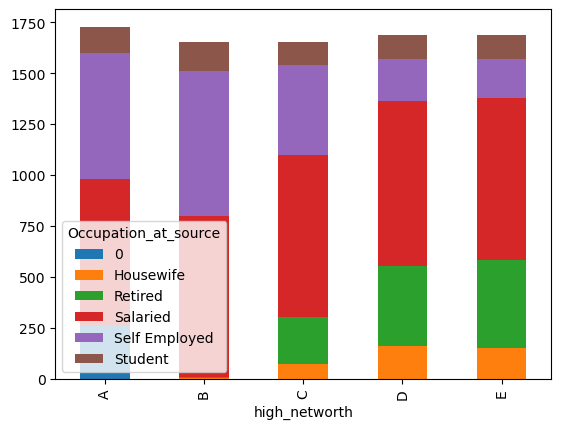

In [885]:
ct=pd.crosstab(index=gd_df2['high_networth'],columns=gd_df2['Occupation_at_source'])
ct.plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='Occupation_at_source', ylabel='ac_active'>

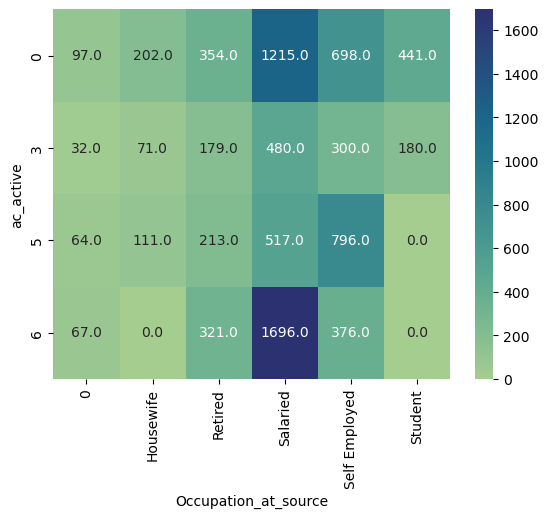

In [896]:
ct=pd.crosstab(index=gd_df2['ac_active'],columns=gd_df2['Occupation_at_source'])
sns.heatmap(ct,annot=True,fmt='.1f',cmap='crest')

<AxesSubplot:xlabel='high_networth', ylabel='ac_active'>

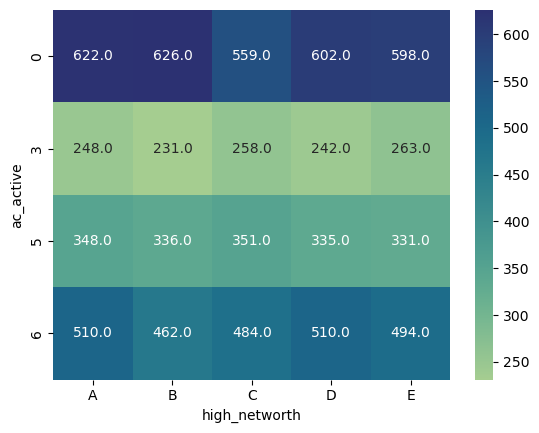

In [897]:
ct=pd.crosstab(index=gd_df2['ac_active'],columns=gd_df2['high_networth'])
sns.heatmap(ct,annot=True,fmt='.1f',cmap='crest')